# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
pd.set_option('display.max_columns', None)

# Load Dataset

**Kolom pada dataset**

---
1. trans_date_trans_time: Waktu transaksi. Dapat digunakan untuk mendeteksi pola waktu (misal transaksi yang sering terjadi pada waktu yang tidak wajar bisa dicurigai sebagai fraud).
2. cc_num: Nomor kartu kredit. Informasi penting terkait pengguna kartu, tetapi tidak langsung membantu mendeteksi fraud kecuali ada pola dari penggunaan kartu yang tidak biasa.
3. merchant: Nama merchant (penjual). Merchant tertentu mungkin lebih sering terlibat dalam transaksi fraud, sehingga bisa membantu mendeteksi risiko terkait merchant.
4. category: Kategori transaksi. Fraud mungkin lebih sering terjadi dalam kategori tertentu seperti barang mewah atau hiburan, yang memiliki nilai transaksi lebih tinggi.
5. amt: Jumlah uang dalam transaksi. Nilai transaksi yang sangat besar atau tidak sesuai dengan pola belanja biasanya bisa menjadi tanda fraud.
6. first: Nama depan pemegang kartu. Tidak terlalu relevan dalam mendeteksi fraud secara langsung.
7. last: Nama belakang pemegang kartu. Sama seperti first, tidak relevan secara langsung.
8. gender: Jenis kelamin pemegang kartu. Bisa digunakan untuk melihat pola demografis terkait fraud, meskipun tidak secara langsung mengindikasikan fraud.
9. street: Alamat jalan pemegang kartu. Dapat digunakan dalam deteksi anomali jika lokasi transaksi berbeda jauh dari alamat pemegang kartu.
10. city: Kota pemegang kartu. Sama seperti street, dapat digunakan untuk memeriksa ketidaksesuaian antara lokasi pemegang kartu dan transaksi.
11. state: Negara bagian pemegang kartu. Sama dengan city, bisa mendeteksi anomali lokasi.
12. zip: Kode pos pemegang kartu. Sama dengan city dan state, bisa membantu mendeteksi anomali geografis.
13. lat: Garis lintang lokasi pemegang kartu. Lokasi geografis dapat membantu mendeteksi ketidaksesuaian jika dibandingkan dengan lokasi transaksi.
14. long: Garis bujur lokasi pemegang kartu. Sama dengan lat, membantu mendeteksi lokasi.
15. city_pop: Populasi kota pemegang kartu. Bisa digunakan untuk memahami risiko terkait daerah, misalnya daerah padat penduduk mungkin memiliki lebih banyak transaksi dan risiko.
16. job: Pekerjaan pemegang kartu. Pekerjaan dengan penghasilan tinggi mungkin lebih rentan terhadap fraud karena lebih sering terlibat dalam transaksi besar.
17. dob: Tanggal lahir pemegang kartu. Usia pemegang kartu bisa menjadi faktor, misalnya kelompok usia tertentu mungkin lebih rentan terhadap fraud.
18. trans_num: ID unik untuk transaksi. Tidak relevan dalam deteksi fraud secara langsung.
19. unix_time: Waktu transaksi dalam format unix. Sama seperti trans_date_trans_time, membantu dalam menganalisis pola waktu.
20. merch_lat: Garis lintang merchant. Dapat digunakan untuk mendeteksi ketidaksesuaian antara lokasi merchant dan pemegang kartu.
21. merch_long: Garis bujur merchant. Sama seperti merch_lat, membantu mendeteksi anomali lokasi.
22. is_fraud: Label apakah transaksi adalah fraud (0 = tidak fraud, 1 = fraud). Ini adalah target yang perlu diprediksi.


In [4]:
# url = '/content/drive/MyDrive/Colab Notebooks/Fraud detection/fraudTrain.csv'
# os.chdir(url)
# !ls

In [5]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Fraud detection/fraudTrain.csv', index_col=0)
train.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [7]:
# train = pd.read_csv('/content/drive/MyDrive/Project 2/fraudTrain.csv', index_col=0)
# train.head()

In [8]:
train.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

# EDA

## Data Type Categories

In [9]:
# Action Items : Drop Kolom
indetifer = ['first', 'last']

# Action Items : New Features, OHE , Label Encoder (bertingkat), Grouping into a bigger group OR nunique more than 20 then drop
category = ['trans_num','cc_num','merchant', 'category', 'gender', 'street', 'city', 'state', 'zip', 'job', 'unix_time']

# Action Items : New Features = Distance
location = ['lat', 'long', 'merch_lat', 'merch_long']

# Action Items : New Features = Risk Time, Risk Day, Age
datetime = ['trans_date_trans_time', 'dob']

# Action Items : New Features : city_pop category, amt category
numerical = ['amt', 'city_pop']

# Action Items : Target Variabel to Modelling
target = ['is_fraud']

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop               

In [11]:
# Melihat variasi data
for category in train[category].columns:
  print(f'Kolom {category} : {train[category].nunique()}')

Kolom trans_num : 1296675
Kolom cc_num : 983
Kolom merchant : 693
Kolom category : 14
Kolom gender : 2
Kolom street : 983
Kolom city : 894
Kolom state : 51
Kolom zip : 970
Kolom job : 494
Kolom unix_time : 1274823


In [12]:
# Filter data yang fraud
fraud = train.loc[train['is_fraud'] == 1].copy() # Use .copy() to avoid SettingWithCopyWarning
print(f'Data Fraud : {len(fraud)}')

# filter fraud berdasar tahun
# Ensure 'year' column exists or extract it from datetime column if needed
if 'year' not in fraud.columns:
    # Assuming 'trans_date_trans_time' is a datetime column
    fraud['year'] = pd.to_datetime(fraud['trans_date_trans_time']).dt.year

fraud_19 = fraud.loc[fraud['year'] == 2019]
fraud_20 = fraud.loc[fraud['year'] == 2020]

print(f'Data Fraud 2019 : {len(fraud_19)}')
print(f'Data Fraud 2020: {len(fraud_20)}')

Data Fraud : 7506
Data Fraud 2019 : 5220
Data Fraud 2020: 2286


## Fraud Category Distribution

In [13]:
train['is_fraud'].value_counts(normalize=True)

,proportion
is_fraud,
0,0.994211
1,0.005789


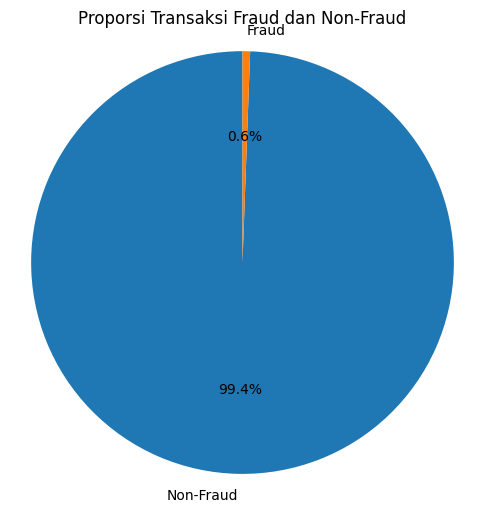

In [14]:
# Menghitung jumlah transaksi fraud dan non-fraud
fraud_counts = train['is_fraud'].value_counts()

# Membuat pie chart
plt.figure(figsize=(6, 6))
plt.pie(fraud_counts, labels=['Non-Fraud', 'Fraud'], autopct='%1.1f%%', startangle=90)
plt.title('Proporsi Transaksi Fraud dan Non-Fraud')
plt.axis('equal')  # Membuat pie chart berbentuk lingkaran
plt.show()

Artinya data ini dalah data Imbalance

## ETC EDA

# Preprocessing Data

## Drop Identifier

In [15]:
# Drop kolom identity
train.drop(columns= indetifer,
              inplace=True)
train.head()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


## Checking Data Duplicates

In [16]:
# cek data duplicated
train.duplicated().sum()

np.int64(0)

## Checking Missing Value (Optional)

In [17]:
# Cek Missing value
train.isnull().sum()

,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
gender,0
street,0
city,0
state,0
zip,0


## Data Imputation (Optional)

## Feature Engineering / New Feature + Label Encoder Manually

### Time Category

In [18]:
# mengubah datetime
train['trans_date_trans_time'] = pd.to_datetime(train['trans_date_trans_time'])
train['dob'] = pd.to_datetime(train['dob'])

# Membuat date dan time transaksi
train['trans_date'] = train['trans_date_trans_time'].dt.date
train['trans_time'] = train['trans_date_trans_time'].dt.time

# membuat tahun, bulan, hari tahun transaksi
train['year'] = train['trans_date_trans_time'].dt.year
train['month'] = train['trans_date_trans_time'].dt.month
train['day'] = train['trans_date_trans_time'].dt.day
train['day_of_week'] = train['trans_date_trans_time'].dt.weekday
train['hour'] = train['trans_date_trans_time'].dt.hour

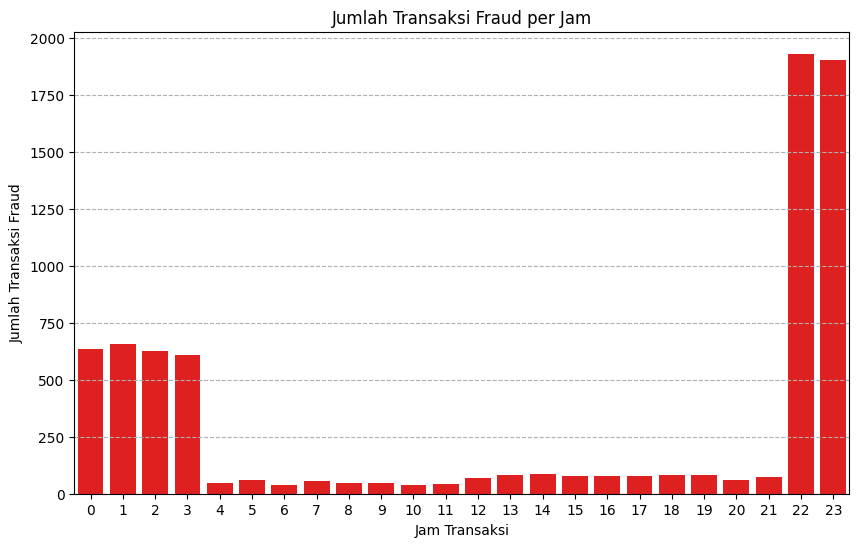

In [19]:
# Filter data yang merupakan transaksi fraud
fraud_data = train[train['is_fraud'] == 1].copy()

# Ekstrak jam dari kolom 'trans_date_trans_time' untuk data fraud
fraud_data['trans_hour'] = fraud_data['trans_date_trans_time'].dt.hour

# Hitung jumlah transaksi fraud per jam
fraud_by_hour = fraud_data['trans_hour'].value_counts().sort_index()

# Buat grafik batang (bar plot) jumlah transaksi fraud per jam
plt.figure(figsize=(10, 6))
sns.barplot(x=fraud_by_hour.index, y=fraud_by_hour.values, color='red')
plt.title('Jumlah Transaksi Fraud per Jam')
plt.xlabel('Jam Transaksi')
plt.ylabel('Jumlah Transaksi Fraud')
plt.xticks(np.arange(0, 24, 1)) # Menetapkan tick pada sumbu x untuk setiap jam
plt.grid(axis='y', linestyle='--')
plt.show()


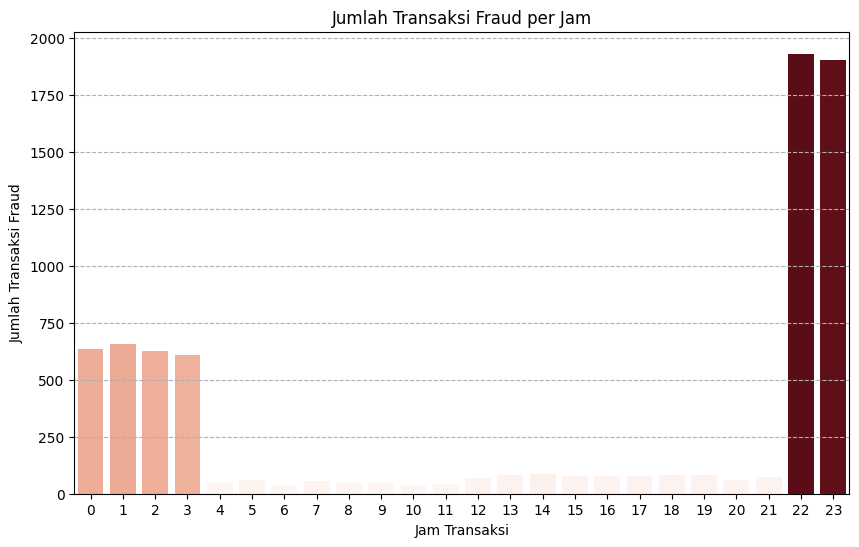

In [20]:
# Filter data yang merupakan transaksi fraud
fraud_data = train[train['is_fraud'] == 1].copy()

# Ekstrak jam dari kolom 'trans_date_trans_time' untuk data fraud
fraud_data['trans_hour'] = fraud_data['trans_date_trans_time'].dt.hour

# Hitung jumlah transaksi fraud per jam
fraud_by_hour = fraud_data['trans_hour'].value_counts().sort_index()

# Normalisasi jumlah transaksi fraud (0 - 1) untuk mapping warna
norm = (fraud_by_hour - fraud_by_hour.min()) / (fraud_by_hour.max() - fraud_by_hour.min())

# Gunakan API baru matplotlib colormaps
cmap = matplotlib.colormaps.get_cmap('Reds')
colors = [cmap(n) for n in norm]

# Konversi data ke dataframe untuk memanfaatkan hue
fraud_df = fraud_by_hour.reset_index()
fraud_df.columns = ['trans_hour', 'fraud_count']

# Buat grafik batang (bar plot) dengan gradasi warna
plt.figure(figsize=(10, 6))
sns.barplot(data=fraud_df, x='trans_hour', y='fraud_count', hue='trans_hour', palette=colors, legend=False)
plt.title('Jumlah Transaksi Fraud per Jam')
plt.xlabel('Jam Transaksi')
plt.ylabel('Jumlah Transaksi Fraud')
plt.xticks(np.arange(0, 24, 1))  # Menetapkan tick pada sumbu x untuk setiap jam
plt.grid(axis='y', linestyle='--')
plt.show()

In [21]:
def categorize_risk_of_hour(hour):
  if hour >= 0 and hour <= 3:
    return  2 #'Risk Time'
  elif hour >= 4 and hour <= 21:
    return 1 #'Safe Time'
  elif hour >= 22 and hour <= 23:
    return 2 #'Risk Time'
  else:
    return 'Unknown'

train['risk_category_of_hour'] = train['hour'] .apply(categorize_risk_of_hour)
train.head()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,trans_time,year,month,day,day_of_week,hour,risk_category_of_hour
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019-01-01,00:00:18,2019,1,1,1,0,2
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01,00:00:44,2019,1,1,1,0,2
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2019-01-01,00:00:51,2019,1,1,1,0,2
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,2019-01-01,00:01:16,2019,1,1,1,0,2
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,2019-01-01,00:03:06,2019,1,1,1,0,2


### Distance

In [22]:
# Fungsi untuk menghitung jarak menggunakan rumus Haversine (Lat and Long Features)
def haversine(lat1, lon1, lat2, lon2):
    # Konversi dari derajat ke radian
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))

    # Jarak dalam kilometer (radius bumi = 6371 km)
    distance = 6371 * c
    return distance

In [23]:
# Menghitung jarak untuk setiap transaksi
train['distance'] = train.apply(lambda row: haversine(row['lat'], row['long'], row['merch_lat'], row['merch_long']), axis=1)

In [24]:
# Misalkan df adalah DataFrame yang berisi kolom 'distance'
bins = [0, train['distance'].quantile(0.25), train['distance'].quantile(0.75), train['distance'].max()]
labels = [1, 2, 3] # 1 = dekat, 2 = sedang, 3 = jauh

# Membuat kolom baru 'distance_category'
train['distance_category'] = pd.cut(train['distance'], bins=bins, labels=labels, include_lowest=True)
train['distance_category'] = train['distance_category'].astype(int)
train.head()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,trans_time,year,month,day,day_of_week,hour,risk_category_of_hour,distance,distance_category
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019-01-01,00:00:18,2019,1,1,1,0,2,78.597568,2
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01,00:00:44,2019,1,1,1,0,2,30.212176,1
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2019-01-01,00:00:51,2019,1,1,1,0,2,108.206083,3
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,2019-01-01,00:01:16,2019,1,1,1,0,2,95.673231,2
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,2019-01-01,00:03:06,2019,1,1,1,0,2,77.556744,2


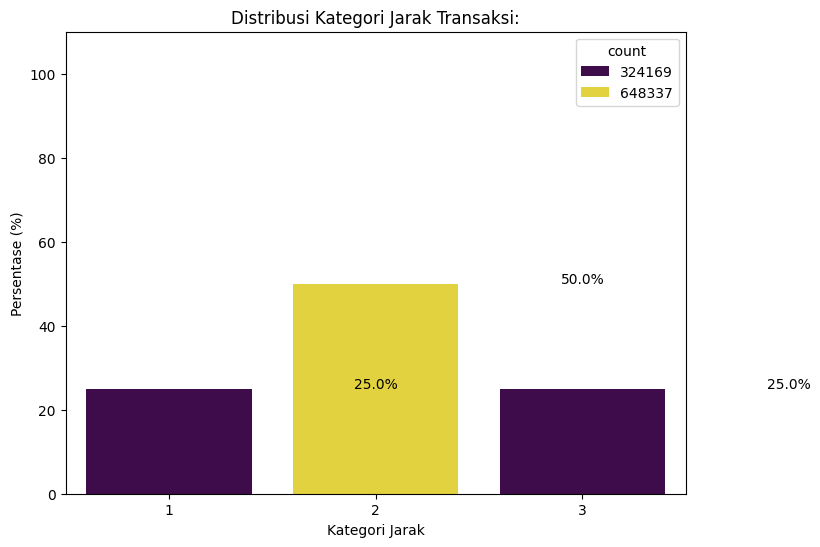

In [25]:
# Hitung frekuensi dan persentase untuk setiap kategori jarak
distance_counts = train['distance_category'].value_counts()
distance_percentages = train['distance_category'].value_counts(normalize=True) * 100

# Gabungkan keduanya ke dalam satu DataFrame
distance_summary = pd.DataFrame({
    'Count': distance_counts,
    'Percentage': distance_percentages
})

# Buat visualisasi
plt.figure(figsize=(8, 6))
sns.barplot(x=distance_summary.index, y=distance_summary['Percentage'], palette='viridis', hue=distance_counts)
plt.title('Distribusi Kategori Jarak Transaksi:')
plt.xlabel('Kategori Jarak')
plt.ylabel('Persentase (%)')

# Menampilkan persentase di atas setiap bar
for index, row in distance_summary.iterrows():
    plt.text(index, row['Percentage'], f'{row["Percentage"]:.1f}%', color='black', ha="center")

plt.ylim(0, 110) # Sesuaikan batas y agar persentase terlihat jelas
plt.show()

### Age

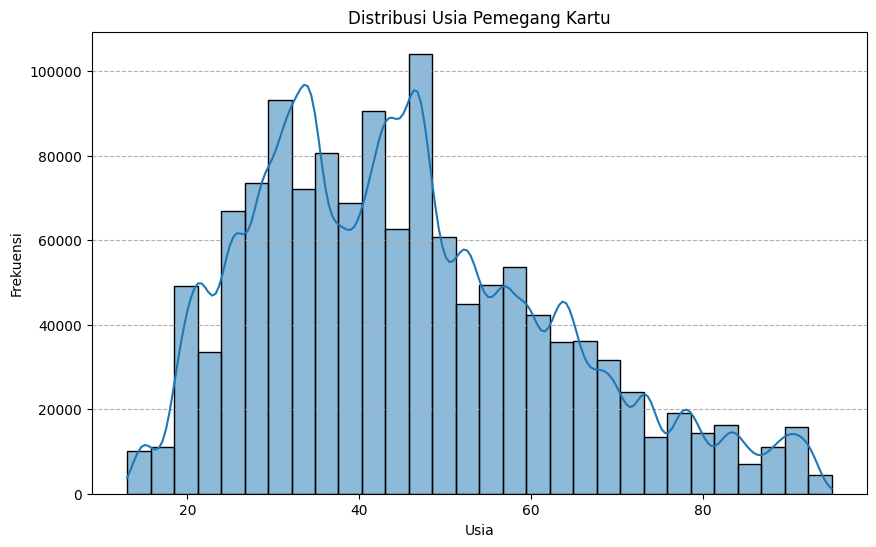

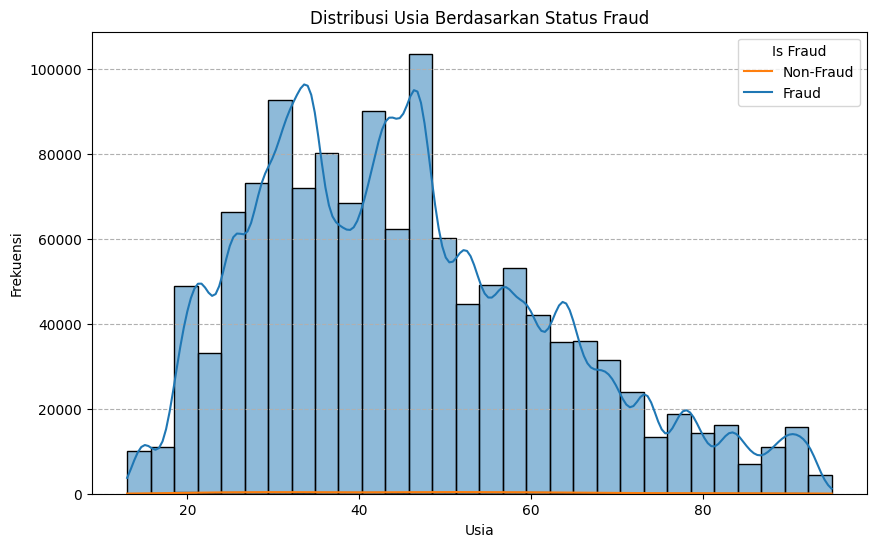

Rata-rata Usia untuk Transaksi Non-Fraud:
45.48061968601479

Rata-rata Usia untuk Transaksi Fraud:
48.289368505195846


In [26]:

import matplotlib.pyplot as plt
from datetime import date

# Function to calculate age
def calculate_age(born, current_date):
    today = current_date.date()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

# Apply the function to create the 'Age' column
train['Age'] = train.apply(lambda row: calculate_age(row['dob'], row['trans_date_trans_time']), axis=1)

train.head()
train['Age'].describe()

# Visualisasi distribusi umur
plt.figure(figsize=(10, 6))
sns.histplot(train['Age'], bins=30, kde=True)
plt.title('Distribusi Usia Pemegang Kartu')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.grid(axis='y', linestyle='--')
plt.show()

# Visualisasi distribusi usia untuk transaksi fraud vs non-fraud
plt.figure(figsize=(10, 6))
sns.histplot(data=train, x='Age', hue='is_fraud', bins=30, kde=True, common_norm=False)
plt.title('Distribusi Usia Berdasarkan Status Fraud')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.legend(title='Is Fraud', labels=['Non-Fraud', 'Fraud'])
plt.grid(axis='y', linestyle='--')
plt.show()

# Cek rata-rata usia untuk transaksi fraud dan non-fraud
print("Rata-rata Usia untuk Transaksi Non-Fraud:")
print(train[train['is_fraud'] == 0]['Age'].mean())

print("\nRata-rata Usia untuk Transaksi Fraud:")
print(train[train['is_fraud'] == 1]['Age'].mean())

In [27]:
train.head()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,trans_time,year,month,day,day_of_week,hour,risk_category_of_hour,distance,distance_category,Age
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019-01-01,00:00:18,2019,1,1,1,0,2,78.597568,2,30
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01,00:00:44,2019,1,1,1,0,2,30.212176,1,40
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2019-01-01,00:00:51,2019,1,1,1,0,2,108.206083,3,56
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,2019-01-01,00:01:16,2019,1,1,1,0,2,95.673231,2,51
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,2019-01-01,00:03:06,2019,1,1,1,0,2,77.556744,2,32


### Gender

In [28]:
# prompt: tolong bikin fitur gender untuk di label encoding kan

from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder
le = LabelEncoder()

# Terapkan Label Encoding pada kolom 'gender'
train['gender_encoded'] = le.fit_transform(train['gender'])

# Tampilkan mapping label encoder
print("Mapping Gender:")
for original, encoded in zip(le.classes_, le.transform(le.classes_)):
    print(f"{original}: {encoded}")

# Tampilkan head DataFrame dengan kolom gender_encoded
print("\nDataFrame with encoded gender:")
train


Mapping Gender:
F: 0
M: 1

DataFrame with encoded gender:


,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,trans_time,year,month,day,day_of_week,hour,risk_category_of_hour,distance,distance_category,Age,gender_encoded
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019-01-01,00:00:18,2019,1,1,1,0,2,78.597568,2,30,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01,00:00:44,2019,1,1,1,0,2,30.212176,1,40,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2019-01-01,00:00:51,2019,1,1,1,0,2,108.206083,3,56,1
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,2019-01-01,00:01:16,2019,1,1,1,0,2,95.673231,2,51,1
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,2019-01-01,00:03:06,2019,1,1,1,0,2,77.556744,2,32,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,M,162 Jessica Row Apt. 072,Hatch,UT,84735,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0,2020-06-21,12:12:08,2020,6,21,6,12,1,119.752136,3,58,1
1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,M,8617 Holmes Terrace Suite 651,Tuscarora,MD,21790,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0,2020-06-21,12:12:19,2020,6,21,6,12,1,75.104085,2,40,1
1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,NM,88325,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0,2020-06-21,12:12:32,2020,6,21,6,12,1,99.047734,3,52,1
1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,M,42933 Ryan Underpass,Manderson,SD,57756,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0,2020-06-21,12:13:36,2020,6,21,6,12,1,84.627652,2,39,1


Statistik Fraud per Gender:
is_fraud       0     1   Total  Fraud_Percentage
gender                                          
F         706128  3735  709863          0.526158
M         583041  3771  586812          0.642625


<Figure size 800x600 with 0 Axes>

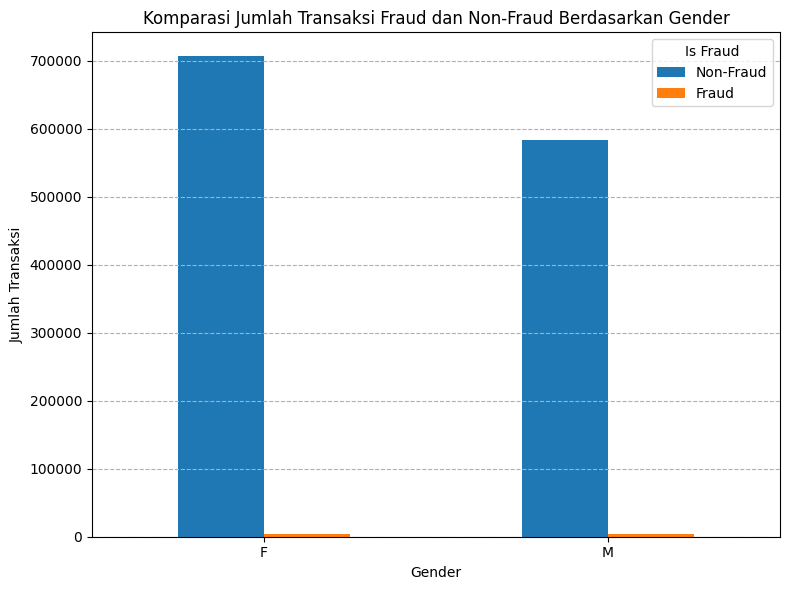

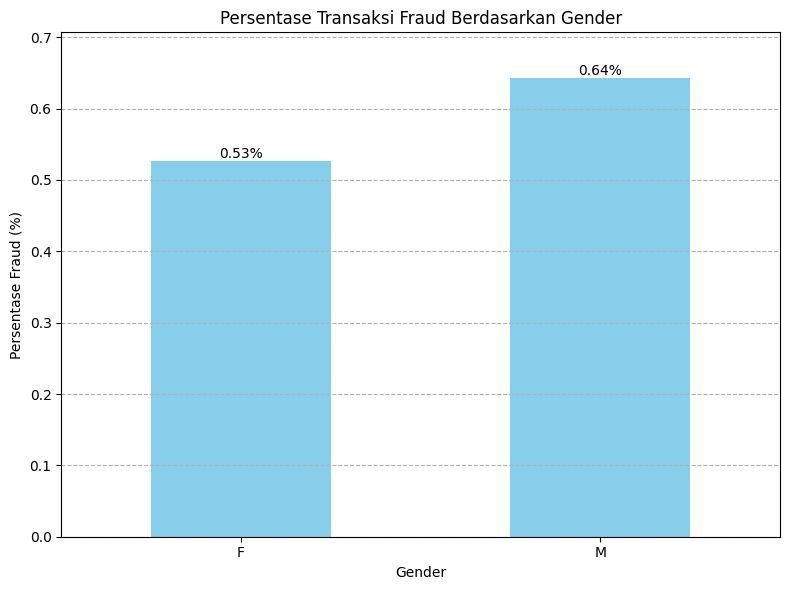

In [29]:
# prompt: buatkan bar untuk komparasi is fraud di masing masing gender

import matplotlib.pyplot as plt
# Hitung jumlah transaksi fraud dan non-fraud untuk setiap gender
gender_fraud_counts = train.groupby(['gender', 'is_fraud']).size().unstack(fill_value=0)

# Hitung total transaksi per gender
gender_fraud_counts['Total'] = gender_fraud_counts[0] + gender_fraud_counts[1]

# Hitung persentase fraud per gender
gender_fraud_counts['Fraud_Percentage'] = (gender_fraud_counts[1] / gender_fraud_counts['Total']) * 100

print("Statistik Fraud per Gender:")
print(gender_fraud_counts)

# Buat bar plot
plt.figure(figsize=(8, 6))
gender_fraud_counts[[0, 1]].plot(kind='bar', stacked=False, figsize=(8, 6))
plt.title('Komparasi Jumlah Transaksi Fraud dan Non-Fraud Berdasarkan Gender')
plt.xlabel('Gender')
plt.ylabel('Jumlah Transaksi')
plt.xticks(rotation=0)
plt.legend(title='Is Fraud', labels=['Non-Fraud', 'Fraud'])
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

# Bar plot persentase fraud per gender
plt.figure(figsize=(8, 6))
gender_fraud_counts['Fraud_Percentage'].plot(kind='bar', color='skyblue')
plt.title('Persentase Transaksi Fraud Berdasarkan Gender')
plt.xlabel('Gender')
plt.ylabel('Persentase Fraud (%)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')

# Menampilkan persentase di atas setiap bar
for index, value in enumerate(gender_fraud_counts['Fraud_Percentage']):
    plt.text(index, value, f'{value:.2f}%', ha='center', va='bottom')

plt.ylim(0, gender_fraud_counts['Fraud_Percentage'].max() * 1.1) # Adjust y-limit
plt.tight_layout()
plt.show()

### amount

In [30]:
Q1 = train['amt'].quantile(0.25)
Q3 = train['amt'].quantile(0.75)
IQR = Q3 - Q1
high_threshold = Q3 + 1.5 * IQR

train['is_high_amount'] = train['amt'].apply(lambda x: 1 if x > high_threshold else 0)

train.head()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,trans_time,year,month,day,day_of_week,hour,risk_category_of_hour,distance,distance_category,Age,gender_encoded,is_high_amount
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019-01-01,00:00:18,2019,1,1,1,0,2,78.597568,2,30,0,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01,00:00:44,2019,1,1,1,0,2,30.212176,1,40,0,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2019-01-01,00:00:51,2019,1,1,1,0,2,108.206083,3,56,1,1
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,2019-01-01,00:01:16,2019,1,1,1,0,2,95.673231,2,51,1,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,2019-01-01,00:03:06,2019,1,1,1,0,2,77.556744,2,32,1,0


Komparasi Transaksi Fraud Berdasarkan Kategori Jumlah (Tinggi vs Tidak Tinggi):
is_fraud              0     1
is_high_amount               
0               1227584  1801
1                 61585  5705

Persentase Fraud Berdasarkan Kategori Jumlah:
is_fraud        Fraud_Percentage
is_high_amount                  
0                       0.146496
1                       8.478229


<Figure size 800x600 with 0 Axes>

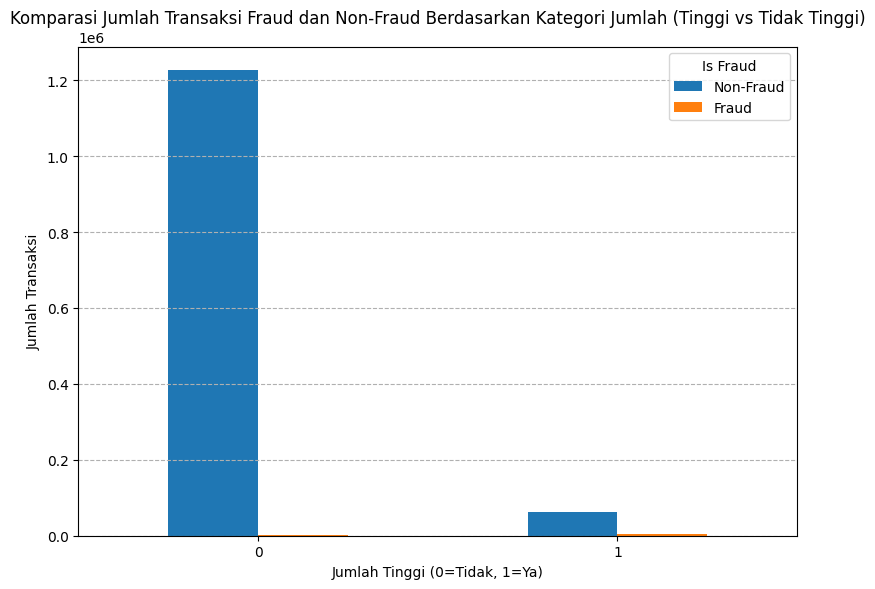

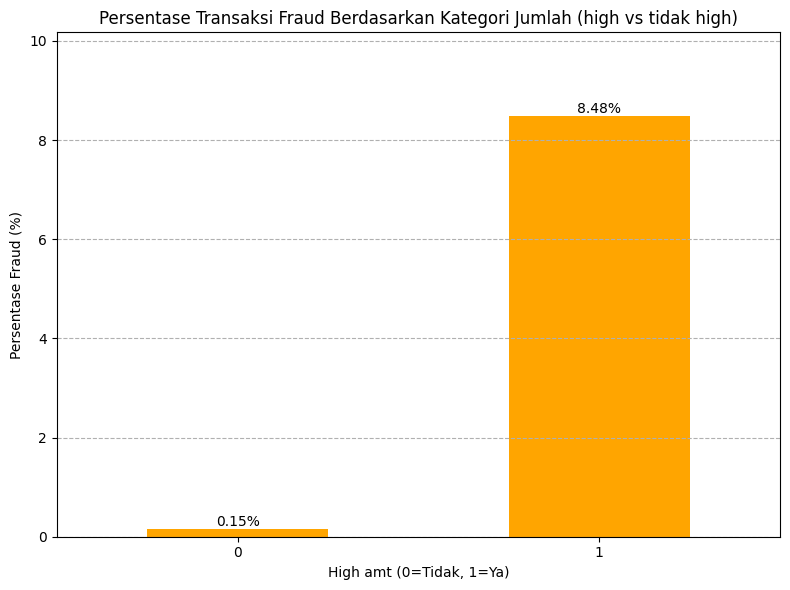

In [31]:

import matplotlib.pyplot as plt
# Komparasi is fraud pada is high amout antara iya atau tidak
high_amount_fraud_comparison = train.groupby('is_high_amount')['is_fraud'].value_counts().unstack(fill_value=0)

print("Komparasi Transaksi Fraud Berdasarkan Kategori Jumlah (Tinggi vs Tidak Tinggi):")
print(high_amount_fraud_comparison)

# Hitung persentase fraud untuk setiap kategori is_high_amount
high_amount_fraud_comparison['Total'] = high_amount_fraud_comparison[0] + high_amount_fraud_comparison[1]
high_amount_fraud_comparison['Fraud_Percentage'] = (high_amount_fraud_comparison[1] / high_amount_fraud_comparison['Total']) * 100

print("\nPersentase Fraud Berdasarkan Kategori Jumlah:")
print(high_amount_fraud_comparison[['Fraud_Percentage']])

# Visualisasi
plt.figure(figsize=(8, 6))
high_amount_fraud_comparison[[0, 1]].plot(kind='bar', stacked=False, figsize=(8, 6))
plt.title('Komparasi Jumlah Transaksi Fraud dan Non-Fraud Berdasarkan Kategori Jumlah (Tinggi vs Tidak Tinggi)')
plt.xlabel('Jumlah Tinggi (0=Tidak, 1=Ya)')
plt.ylabel('Jumlah Transaksi')
plt.xticks(rotation=0)
plt.legend(title='Is Fraud', labels=['Non-Fraud', 'Fraud'])
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
high_amount_fraud_comparison['Fraud_Percentage'].plot(kind='bar', color='orange')
plt.title('Persentase Transaksi Fraud Berdasarkan Kategori Jumlah (high vs tidak high)')
plt.xlabel('High amt (0=Tidak, 1=Ya)')
plt.ylabel('Persentase Fraud (%)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')

# Menampilkan persentase di atas setiap bar
for index, value in enumerate(high_amount_fraud_comparison['Fraud_Percentage']):
    plt.text(index, value, f'{value:.2f}%', ha='center', va='bottom')

plt.ylim(0, high_amount_fraud_comparison['Fraud_Percentage'].max() * 1.2) # Adjust y-limit
plt.tight_layout()
plt.show()

### night transaction

In [32]:
# kolom dalam format datetime
train['trans_date_trans_time'] = pd.to_datetime(train['trans_date_trans_time'])

# ekstrak jam
train['hour'] = train['trans_date_trans_time'].dt.hour

train['is_night_transaction'] = train['hour'].apply(lambda x: 1 if x >= 22 or x <= 6 else 0)

train.head()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,trans_time,year,month,day,day_of_week,hour,risk_category_of_hour,distance,distance_category,Age,gender_encoded,is_high_amount,is_night_transaction
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019-01-01,00:00:18,2019,1,1,1,0,2,78.597568,2,30,0,0,1
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01,00:00:44,2019,1,1,1,0,2,30.212176,1,40,0,0,1
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2019-01-01,00:00:51,2019,1,1,1,0,2,108.206083,3,56,1,1,1
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,2019-01-01,00:01:16,2019,1,1,1,0,2,95.673231,2,51,1,0,1
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,2019-01-01,00:03:06,2019,1,1,1,0,2,77.556744,2,32,1,0,1


Komparasi Transaksi Fraud Berdasarkan Status Transaksi Malam (is_night_transaction):
is_fraud                   0     1
is_night_transaction              
0                     864461   998
1                     424708  6508

Persentase Fraud Berdasarkan Status Transaksi Malam:
is_fraud              Fraud_Percentage
is_night_transaction                  
0                             0.115315
1                             1.509220


<Figure size 800x600 with 0 Axes>

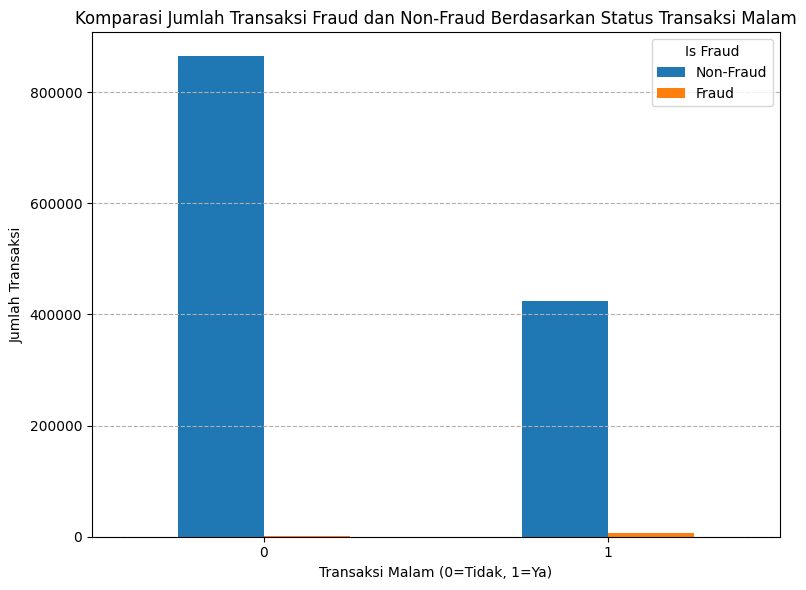

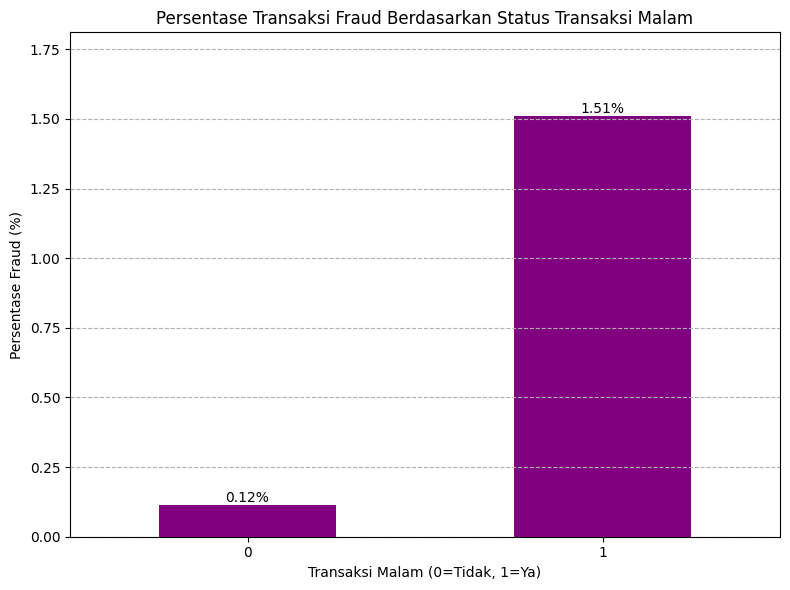

In [33]:
# prompt: buatkan komparasi is_night_transaction pada is fraud

import matplotlib.pyplot as plt
# Komparasi is_night_transaction pada is fraud
night_transaction_fraud_comparison = train.groupby('is_night_transaction')['is_fraud'].value_counts().unstack(fill_value=0)

print("Komparasi Transaksi Fraud Berdasarkan Status Transaksi Malam (is_night_transaction):")
print(night_transaction_fraud_comparison)

# Hitung persentase fraud untuk setiap kategori is_night_transaction
night_transaction_fraud_comparison['Total'] = night_transaction_fraud_comparison[0] + night_transaction_fraud_comparison[1]
night_transaction_fraud_comparison['Fraud_Percentage'] = (night_transaction_fraud_comparison[1] / night_transaction_fraud_comparison['Total']) * 100

print("\nPersentase Fraud Berdasarkan Status Transaksi Malam:")
print(night_transaction_fraud_comparison[['Fraud_Percentage']])

# Visualisasi
plt.figure(figsize=(8, 6))
night_transaction_fraud_comparison[[0, 1]].plot(kind='bar', stacked=False, figsize=(8, 6))
plt.title('Komparasi Jumlah Transaksi Fraud dan Non-Fraud Berdasarkan Status Transaksi Malam')
plt.xlabel('Transaksi Malam (0=Tidak, 1=Ya)')
plt.ylabel('Jumlah Transaksi')
plt.xticks(rotation=0)
plt.legend(title='Is Fraud', labels=['Non-Fraud', 'Fraud'])
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
night_transaction_fraud_comparison['Fraud_Percentage'].plot(kind='bar', color='purple')
plt.title('Persentase Transaksi Fraud Berdasarkan Status Transaksi Malam')
plt.xlabel('Transaksi Malam (0=Tidak, 1=Ya)')
plt.ylabel('Persentase Fraud (%)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')

# Menampilkan persentase di atas setiap bar
for index, value in enumerate(night_transaction_fraud_comparison['Fraud_Percentage']):
    plt.text(index, value, f'{value:.2f}%', ha='center', va='bottom')

plt.ylim(0, night_transaction_fraud_comparison['Fraud_Percentage'].max() * 1.2) # Adjust y-limit
plt.tight_layout()
plt.show()

### High Frequency

In [34]:
# jumlah transaksi per hari
train['trans_date'] = pd.to_datetime(train['trans_date_trans_time']).dt.date
train['transaction_count_daily'] = train.groupby(['cc_num', 'trans_date'])['trans_num'].transform('count')

# rolling time 1 jam
train = train.sort_values(by=['cc_num', 'trans_date_trans_time'])
train['prev_time'] = train.groupby('cc_num')['trans_date_trans_time'].shift(1)
train['time_diff_minutes'] = (train['trans_date_trans_time'] - train['prev_time']).dt.total_seconds() / 60

# buat is_high_freaquency
train['is_high_frequency'] = train['time_diff_minutes'].apply(lambda x: 1 if x is not None and x < 10 else 0)


In [35]:
train.head()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,trans_time,year,month,day,day_of_week,hour,risk_category_of_hour,distance,distance_category,Age,gender_encoded,is_high_amount,is_night_transaction,transaction_count_daily,prev_time,time_diff_minutes,is_high_frequency
1017,2019-01-01 12:47:15,60416207185,"fraud_Jones, Sawayn and Romaguera",misc_net,7.27,F,9886 Anita Drive,Fort Washakie,WY,82514,43.0048,-108.8964,1645,Information systems manager,1986-02-17,98e3dcf98101146a577f85a34e58feec,1325422035,43.974711,-109.741904,0,2019-01-01,12:47:15,2019,1,1,1,12,1,127.606239,3,32,0,0,0,1,NaT,NaN,0
2724,2019-01-02 08:44:57,60416207185,fraud_Berge LLC,gas_transport,52.94,F,9886 Anita Drive,Fort Washakie,WY,82514,43.0048,-108.8964,1645,Information systems manager,1986-02-17,498120fc45d277f7c88e3dba79c33865,1325493897,42.018766,-109.044172,0,2019-01-02,08:44:57,2019,1,2,2,8,1,110.308921,3,32,0,0,0,4,2019-01-01 12:47:15,1197.700000,0
2726,2019-01-02 08:47:36,60416207185,fraud_Luettgen PLC,gas_transport,82.08,F,9886 Anita Drive,Fort Washakie,WY,82514,43.0048,-108.8964,1645,Information systems manager,1986-02-17,95f514bb993151347c7acdf8505c3d62,1325494056,42.961335,-109.157564,0,2019-01-02,08:47:36,2019,1,2,2,8,1,21.787261,1,32,0,0,0,4,2019-01-02 08:44:57,2.650000,1
2882,2019-01-02 12:38:14,60416207185,fraud_Daugherty LLC,kids_pets,34.79,F,9886 Anita Drive,Fort Washakie,WY,82514,43.0048,-108.8964,1645,Information systems manager,1986-02-17,4f0c1a14e0aa7eb56a490780ef9268c5,1325507894,42.228227,-108.747683,0,2019-01-02,12:38:14,2019,1,2,2,12,1,87.204215,2,32,0,0,0,4,2019-01-02 08:47:36,230.633333,0
2907,2019-01-02 13:10:46,60416207185,fraud_Beier and Sons,home,27.18,F,9886 Anita Drive,Fort Washakie,WY,82514,43.0048,-108.8964,1645,Information systems manager,1986-02-17,3b2ebd3af508afba959640893e1e82bc,1325509846,43.321745,-108.091143,0,2019-01-02,13:10:46,2019,1,2,2,13,1,74.212965,2,32,0,0,0,4,2019-01-02 12:38:14,32.533333,0


In [36]:
train['log_amt'] = np.log1p(train['amt'])

In [37]:
train.head()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,trans_time,year,month,day,day_of_week,hour,risk_category_of_hour,distance,distance_category,Age,gender_encoded,is_high_amount,is_night_transaction,transaction_count_daily,prev_time,time_diff_minutes,is_high_frequency,log_amt
1017,2019-01-01 12:47:15,60416207185,"fraud_Jones, Sawayn and Romaguera",misc_net,7.27,F,9886 Anita Drive,Fort Washakie,WY,82514,43.0048,-108.8964,1645,Information systems manager,1986-02-17,98e3dcf98101146a577f85a34e58feec,1325422035,43.974711,-109.741904,0,2019-01-01,12:47:15,2019,1,1,1,12,1,127.606239,3,32,0,0,0,1,NaT,NaN,0,2.112635
2724,2019-01-02 08:44:57,60416207185,fraud_Berge LLC,gas_transport,52.94,F,9886 Anita Drive,Fort Washakie,WY,82514,43.0048,-108.8964,1645,Information systems manager,1986-02-17,498120fc45d277f7c88e3dba79c33865,1325493897,42.018766,-109.044172,0,2019-01-02,08:44:57,2019,1,2,2,8,1,110.308921,3,32,0,0,0,4,2019-01-01 12:47:15,1197.700000,0,3.987872
2726,2019-01-02 08:47:36,60416207185,fraud_Luettgen PLC,gas_transport,82.08,F,9886 Anita Drive,Fort Washakie,WY,82514,43.0048,-108.8964,1645,Information systems manager,1986-02-17,95f514bb993151347c7acdf8505c3d62,1325494056,42.961335,-109.157564,0,2019-01-02,08:47:36,2019,1,2,2,8,1,21.787261,1,32,0,0,0,4,2019-01-02 08:44:57,2.650000,1,4.419804
2882,2019-01-02 12:38:14,60416207185,fraud_Daugherty LLC,kids_pets,34.79,F,9886 Anita Drive,Fort Washakie,WY,82514,43.0048,-108.8964,1645,Information systems manager,1986-02-17,4f0c1a14e0aa7eb56a490780ef9268c5,1325507894,42.228227,-108.747683,0,2019-01-02,12:38:14,2019,1,2,2,12,1,87.204215,2,32,0,0,0,4,2019-01-02 08:47:36,230.633333,0,3.577669
2907,2019-01-02 13:10:46,60416207185,fraud_Beier and Sons,home,27.18,F,9886 Anita Drive,Fort Washakie,WY,82514,43.0048,-108.8964,1645,Information systems manager,1986-02-17,3b2ebd3af508afba959640893e1e82bc,1325509846,43.321745,-108.091143,0,2019-01-02,13:10:46,2019,1,2,2,13,1,74.212965,2,32,0,0,0,4,2019-01-02 12:38:14,32.533333,0,3.338613


Komparasi Transaksi Fraud Berdasarkan Frekuensi Tinggi (Tinggi vs Tidak Tinggi):
is_fraud                 0     1
is_high_frequency               
0                  1249722  6609
1                    39447   897

Persentase Fraud Berdasarkan Frekuensi Tinggi:
is_fraud           Fraud_Percentage
is_high_frequency                  
0                          0.526056
1                          2.223379


<Figure size 800x600 with 0 Axes>

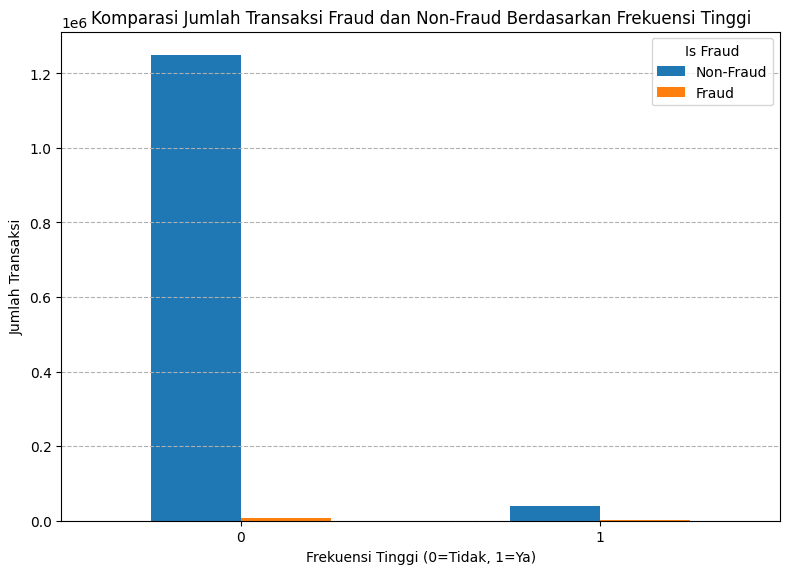

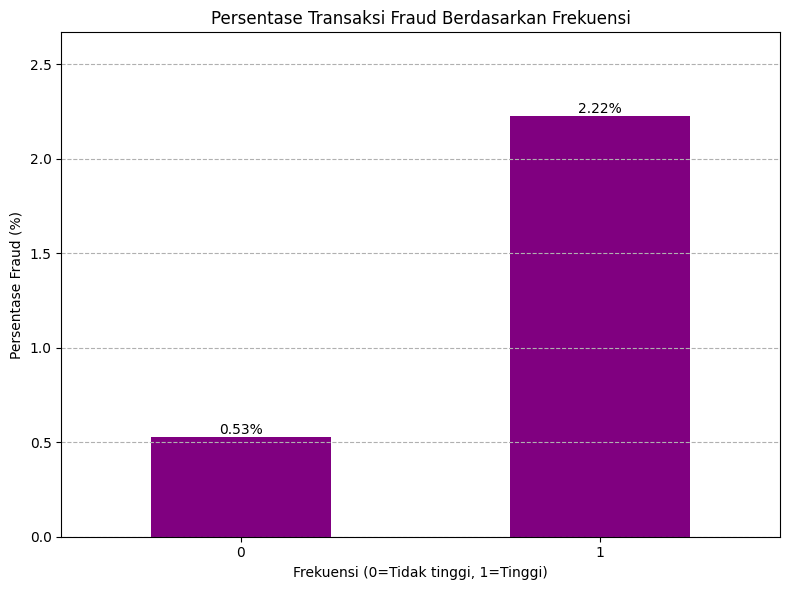

In [38]:
# prompt: buatkan bar untuk komparasi is fraud di masing masing high frequency

import matplotlib.pyplot as plt
# Hitung komparasi is_fraud untuk masing-masing kategori is_high_frequency
high_frequency_fraud_comparison = train.groupby('is_high_frequency')['is_fraud'].value_counts().unstack(fill_value=0)

print("Komparasi Transaksi Fraud Berdasarkan Frekuensi Tinggi (Tinggi vs Tidak Tinggi):")
print(high_frequency_fraud_comparison)

# Hitung persentase fraud untuk setiap kategori is_high_frequency
high_frequency_fraud_comparison['Total'] = high_frequency_fraud_comparison[0] + high_frequency_fraud_comparison[1]
high_frequency_fraud_comparison['Fraud_Percentage'] = (high_frequency_fraud_comparison[1] / high_frequency_fraud_comparison['Total']) * 100

print("\nPersentase Fraud Berdasarkan Frekuensi Tinggi:")
print(high_frequency_fraud_comparison[['Fraud_Percentage']])

# Visualisasi jumlah transaksi fraud dan non-fraud per kategori is_high_frequency
plt.figure(figsize=(8, 6))
high_frequency_fraud_comparison[[0, 1]].plot(kind='bar', stacked=False, figsize=(8, 6))
plt.title('Komparasi Jumlah Transaksi Fraud dan Non-Fraud Berdasarkan Frekuensi Tinggi')
plt.xlabel('Frekuensi Tinggi (0=Tidak, 1=Ya)')
plt.ylabel('Jumlah Transaksi')
plt.xticks(rotation=0)
plt.legend(title='Is Fraud', labels=['Non-Fraud', 'Fraud'])
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

# Visualisasi persentase fraud per kategori is_high_frequency
plt.figure(figsize=(8, 6))
high_frequency_fraud_comparison['Fraud_Percentage'].plot(kind='bar', color='purple')
plt.title('Persentase Transaksi Fraud Berdasarkan Frekuensi')
plt.xlabel('Frekuensi (0=Tidak tinggi, 1=Tinggi)')
plt.ylabel('Persentase Fraud (%)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')

# Menampilkan persentase di atas setiap bar
for index, value in enumerate(high_frequency_fraud_comparison['Fraud_Percentage']):
    plt.text(index, value, f'{value:.2f}%', ha='center', va='bottom')

plt.ylim(0, high_frequency_fraud_comparison['Fraud_Percentage'].max() * 1.2) # Adjust y-limit
plt.tight_layout()
plt.show()

###JOB

In [39]:
train['job']

,job
1017,Information systems manager
2724,Information systems manager
2726,Information systems manager
2882,Information systems manager
2907,Information systems manager
...,...
1294934,Audiological scientist
1295369,Audiological scientist
1295587,Audiological scientist
1296206,Audiological scientist


In [40]:
train['job'].unique()

array(['Information systems manager', 'Secondary school teacher',
       "Barrister's clerk", "Politician's assistant",
       'Horticulturist, commercial', 'Programmer, applications',
       'Television camera operator', 'Call centre manager',
       'Chief Marketing Officer', 'Buyer, industrial',
       'Armed forces logistics/support/administrative officer',
       'Pilot, airline', 'Therapist, horticultural', 'Dancer',
       'Ceramics designer', 'Naval architect', 'Engineer, agricultural',
       'Health service manager', 'Sport and exercise psychologist',
       'Exhibition designer', "Nurse, children's", 'Soil scientist',
       'Prison officer', 'Economist', 'Copywriter, advertising',
       'Television floor manager', 'Lecturer, higher education',
       'Sales professional, IT', 'Exhibitions officer, museum/gallery',
       'Freight forwarder', 'Engineering geologist',
       'Surveyor, hydrographic', 'Trade mark attorney',
       'Public relations account executive', 'Engine

In [41]:
job_categories = {
    # 1. Manajemen Umum & Eksekutif
    'General Management': [
        'Chief Executive Officer', 'Chief Financial Officer', 'Chief Marketing Officer',
        'Chief Operating Officer', 'Chief Strategy Officer', 'Chief Technology Officer',
        'Chief of Staff', 'Comptroller', 'Information systems manager', 'Call centre manager',
        'Health service manager', 'Hotel manager', 'Theatre manager', 'Theme park manager',
        'Public house manager', 'Restaurant manager', 'Catering manager', 'Leisure centre manager',
        'Fitness centre manager', 'Facilities manager', 'Retail manager', 'Warehouse manager',
        'Farm manager', 'Production manager', 'Volunteer coordinator'
    ],

    # 2. Pendidikan Murni
    'Education': [
        'Secondary school teacher', 'Primary school teacher', 'Early years teacher',
        'Special educational needs teacher', 'Lecturer, higher education', 'Further education lecturer',
        'English as a second language teacher', 'English as a foreign language teacher',
        'Music tutor', 'Teaching laboratory technician', 'Education officer',
        'Teacher, special educational needs', 'Teacher, early years/pre', 'Teacher, adult education',
        'Professor Emeritus', 'Associate Professor', 'Private music teacher', 'TEFL teacher',
        'Education administrator', 'Museum education officer'
    ],

    # 3. Kesehatan Klinis
    'Clinical Healthcare': [
        'Doctor, general practice', 'Doctor, hospital', 'Surgeon', 'Nurse, children\'s',
        'Nurse, mental health', 'Paediatric nurse', 'Physiotherapist', 'Chiropodist',
        'Podiatrist', 'Paramedic', 'Hospital pharmacist', 'Community pharmacist',
        'Medical secretary', 'Pathologist', 'Health visitor', 'Clinical psychologist',
        'Osteopath', 'Optometrist', 'Dispensing optician', 'Radiographer, diagnostic',
        'Radiographer, therapeutic', 'Medical physicist', 'Clinical research associate',
        'Embryologist, clinical', 'Cytogeneticist', 'Clinical cytogeneticist',
        'Oncologist', 'Neurosurgeon', 'Learning disability nurse'
    ],

    # 4. Hukum & Penegakan Hukum
    'Legal & Law Enforcement': [
        'Barrister', 'Solicitor', 'Lawyer', 'Police officer', 'Prison officer',
        'Probation officer', 'Immigration officer', 'Chartered legal executive (England and Wales)',
        'Legal secretary', 'Patent attorney', 'Trade mark attorney', 'Barrister\'s clerk',
        'Forensic psychologist', 'Intelligence analyst', 'Firefighter', 'Ambulance person',
        'Trading standards officer', 'Licensed conveyancer'
    ],

    # 5. Teknologi Informasi
    'Information Technology': [
        'Programmer, applications', 'Database administrator', 'IT consultant',
        'IT trainer', 'Systems analyst', 'Network engineer', 'Web designer',
        'Data scientist', 'Programmer, multimedia', 'Applications developer',
        'Systems developer', 'Software developer', 'IT sales professional',
        'UX designer', 'SEO specialist', 'Cyber security analyst'
    ],

    # 6. Teknik & Arsitektur
    'Engineering & Architecture': [
        'Engineer, civil', 'Engineer, mechanical', 'Engineer, electrical',
        'Engineer, electronics', 'Engineer, automotive', 'Engineer, petroleum',
        'Engineer, biomedical', 'Engineer, structural', 'Engineer, aeronautical',
        'Engineer, mining', 'Engineer, drilling', 'Engineer, manufacturing',
        'Naval architect', 'Architect', 'Architectural technologist',
        'Building control surveyor', 'Building surveyor', 'Engineer, land',
        'Engineer, maintenance', 'Landscape architect', 'Mining engineer',
        'Petroleum engineer', 'Quantity surveyor', 'Structural engineer',
        'Water engineer', 'Engineer, agricultural', 'Engineer, building services',
        'Engineer, chemical', 'Engineer, control and instrumentation'
    ],

    # 7. Seni & Desain Kreatif
    'Creative Arts': [
        'Artist', 'Fine artist', 'Designer, interior/spatial', 'Designer, industrial/product',
        'Designer, furniture', 'Designer, jewellery', 'Designer, ceramics/pottery',
        'Designer, textile', 'Designer, multimedia', 'Animator', 'Illustrator',
        'Glass blower/designer', 'Ceramics designer', 'Furniture designer',
        'Jewellery designer', 'Set designer', 'Interior and spatial designer',
        'Textile designer', 'Visual merchandiser', 'Exhibition designer',
        'Cartographer'
    ],

    # 8. Media & Jurnalistik
    'Media & Journalism': [
        'Journalist, newspaper', 'Magazine journalist', 'Broadcast journalist',
        'Copywriter, advertising', 'Editor, film/video', 'Editor, magazine features',
        'Editor, commissioning', 'Press sub', 'Lexicographer', 'Writer',
        'Press photographer', 'Television production assistant', 'Television floor manager',
        'Television camera operator', 'Camera operator', 'Broadcast presenter',
        'Presenter, broadcasting', 'Radio producer', 'Producer, radio',
        'Producer, television/film/video', 'Television/film/video producer',
        'Film/video editor', 'Video editor', 'Programme researcher, broadcasting/film/video',
        'Radio broadcast assistant', 'Science writer'
    ],

    # 9. Keuangan & Asuransi
    'Finance & Insurance': [
        'Accountant, chartered', 'Accountant, chartered certified', 'Chartered accountant',
        'Financial adviser', 'Financial trader', 'Futures trader', 'Equities trader',
        'Investment analyst', 'Corporate investment banker', 'Tax adviser',
        'Tax inspector', 'Senior tax professional/tax inspector', 'Insurance underwriter',
        'Insurance broker', 'Insurance risk surveyor', 'Claims inspector/assessor',
        'Insurance claims handler', 'Pensions consultant', 'Pension scheme manager',
        'Risk analyst'
    ],

    # 10. Penjualan & Pemasaran
    'Sales & Marketing': [
        'Sales executive', 'Sales professional, IT', 'Retail buyer', 'Buyer, industrial',
        'Buyer, retail', 'Retail merchandiser', 'Marketing executive', 'Digital marketing executive',
        'Brand manager', 'Product manager', 'Business development manager',
        'Account manager', 'Sales manager', 'Telesales executive', 'Public relations officer',
        'Public relations account executive', 'Advertising account executive',
        'Advertising account planner', 'Media planner', 'Media buyer'
    ],

    # 11. Pertanian & Lingkungan
    'Agriculture & Environment': [
        'Horticulturist, commercial', 'Commercial horticulturist', 'Horticultural consultant',
        'Arboriculturist', 'Tree surgeon', 'Agricultural consultant', 'Farm manager',
        'Soil scientist', 'Ecologist', 'Environmental consultant', 'Environmental manager',
        'Environmental health practitioner', 'Conservation officer', 'Nature conservation officer',
        'Forest/woodland manager', 'Fisheries officer', 'Water quality scientist',
        'Hydrologist', 'Hydrogeologist', 'Oceanographer', 'Waste management officer',
        'Energy manager'
    ],

    # 12. Ilmu Pengetahuan Murni
    'Pure Sciences': [
        'Scientist, biomedical', 'Scientist, research (medical)', 'Scientist, research (maths)',
        'Scientist, research (physical sciences)', 'Clinical biochemist', 'Biochemist, clinical',
        'Immunologist', 'Geneticist, molecular', 'Plant breeder/geneticist', 'Toxicologist',
        'Pharmacologist', 'Materials engineer', 'Metallurgist', 'Colour technologist',
        'Technical brewer', 'Analytical chemist', 'Chemist, analytical', 'Archaeologist',
        'Geologist, engineering', 'Geophysicist/field seismologist', 'Field seismologist',
        'Geochemist', 'Geoscientist', 'Minerals surveyor', 'Mudlogger'
    ],

    # 13. Layanan Sosial
    'Social Services': [
        'Social worker', 'Community development worker', 'Community education officer',
        'Community arts worker', 'Advice worker', 'Counsellor', 'Psychotherapist',
        'Child psychotherapist', 'Dance movement psychotherapist', 'Art therapist',
        'Music therapist', 'Drama therapist', 'Youth worker', 'Family support worker',
        'Homelessness officer', 'Housing officer', 'Careers adviser',
        'Careers information officer', 'Learning mentor', 'Charity officer',
        'Charity fundraiser', 'Aid worker', 'Development worker, international aid'
    ],

    # 14. Transportasi
    'Transportation': [
        'Pilot, airline', 'Airline pilot', 'Air traffic controller', 'Cabin crew',
        'Air cabin crew', 'Ship broker', 'Freight forwarder', 'Logistics and distribution manager',
        'Transport planner', 'Warehouse manager', 'Courier', 'HGV driver',
        'Maritime officer', 'Port operations manager', 'Supply chain manager',
        'Fleet manager', 'Rail operations manager', 'Aviation manager'
    ],

    # 15. Konstruksi & Properti
    'Construction & Property': [
        'Building surveyor', 'Quantity surveyor', 'Civil engineer, contracting',
        'Contracting civil engineer', 'Site engineer', 'Construction manager',
        'Building services engineer', 'Estate manager/land agent',
        'Commercial/residential surveyor', 'Planning and development surveyor',
        'Rural practice surveyor', 'Land/geomatics surveyor', 'Surveyor, mining',
        'Surveyor, hydrographic', 'Hydrographic surveyor', 'Town planner',
        'Urban designer', 'Property manager', 'Construction safety officer',
        'Building inspector'
    ],

    # 16. Administrasi & Pemerintahan
    'Administration & Government': [
        'Administrator', 'Administrator, education', 'Administrator, arts',
        'Administrator, local government', 'Administrator, charities/voluntary organisations',
        'Civil Service administrator', 'Civil Service fast streamer', 'Local government officer',
        'Secretary/administrator', 'Company secretary', 'Personal assistant',
        'Office manager', 'Records manager', 'Archivist', 'Curator', 'Heritage manager',
        'Librarian, public', 'Librarian, academic', 'Information officer',
        'Registry administrator'
    ],

    # 17. SDM & Pelatihan
    'HR & Training': [
        'Human resources officer', 'Personnel officer', 'Recruitment consultant',
        'Training and development officer', 'Learning and development adviser',
        'HR manager', 'Recruitment manager', 'Compensation and benefits manager',
        'Employee relations adviser', 'Diversity and inclusion officer',
        'Equality and diversity officer', 'Occupational psychologist',
        'Health and safety adviser', 'HR administrator'
    ],

    # 18. Konsultasi Bisnis
    'Business Consulting': [
        'Management consultant', 'Business consultant', 'Financial consultant',
        'HR consultant', 'Marketing consultant', 'Public affairs consultant',
        'Policy adviser', 'Risk consultant', 'Sustainability consultant',
        'Strategy consultant', 'Technical consultant', 'Change management consultant',
        'Project management consultant'
    ],

    # 19. Terapi & Psikologi
    'Therapy & Psychology': [
        'Occupational therapist', 'Educational psychologist', 'Psychologist, forensic',
        'Psychologist, counselling', 'Psychologist, sport and exercise',
        'Therapist, horticultural', 'Nutritional therapist', 'Herbalist',
        'Phytotherapist', 'Acupuncturist', 'Homeopath', 'Audiological scientist',
        'Scientist, audiological', 'Physiological scientist'
    ],

    # 20. Lainnya
    'Other Professions': [
        'Interpreter', 'Translator', 'Private investigator', 'Funeral director',
        'Wedding planner', 'Life coach', 'Personal trainer', 'Fitness instructor',
        'Yoga teacher', 'Driving instructor', 'Estate agent', 'Auctioneer',
        'Antique dealer', 'Art dealer', 'Bookmaker', 'Magician', 'Zookeeper',
        'Veterinary nurse', 'Dog groomer', 'Horse trainer', 'Jockey'
    ]
}

def categorize_job(job_title):
    # Normalisasi input
    job_lower = job_title.lower().strip()

    # Cari di setiap kategori
    for category, jobs in job_categories.items():
        for job in jobs:
            if job.lower() in job_lower or job_lower in job.lower():
                return category

    return 'Other'  # Jika tidak ditemukan di kategori manapun

/tmp/ipython-input-42-595752863.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_by_job_category.index, y=fraud_by_job_category.values, palette='viridis') # Gunakan palette yang menarik


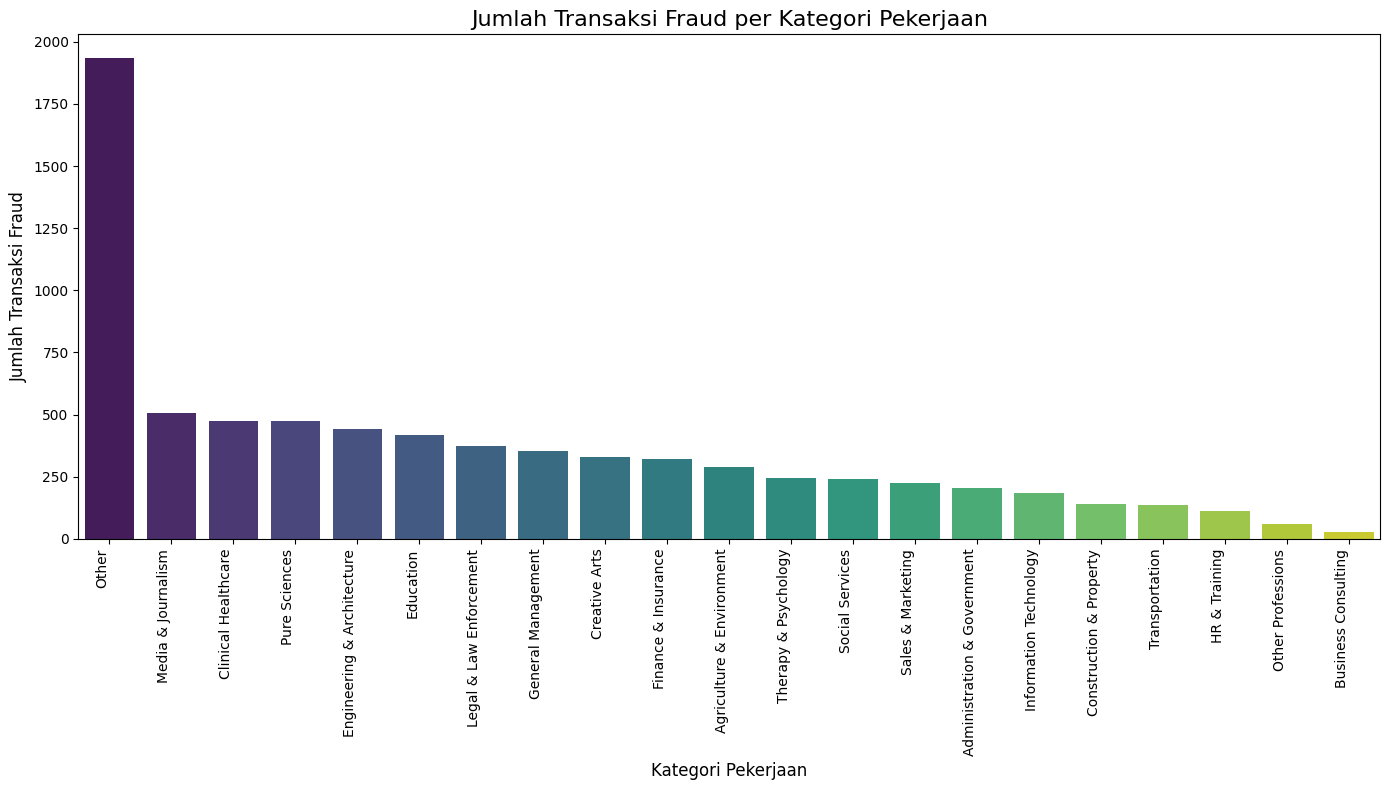

In [42]:
import matplotlib.pyplot as plt
# Filter data yang merupakan transaksi fraud
fraud_data = train[train['is_fraud'] == 1].copy()

# Terapkan fungsi categorize_job pada data fraud
fraud_data['job_category'] = fraud_data['job'].apply(categorize_job)

# Hitung jumlah fraud untuk setiap kategori pekerjaan
fraud_by_job_category = fraud_data['job_category'].value_counts()

# Buat histogram (bar plot)
plt.figure(figsize=(14, 8)) # Sesuaikan ukuran figure
sns.barplot(x=fraud_by_job_category.index, y=fraud_by_job_category.values, palette='viridis') # Gunakan palette yang menarik
plt.title('Jumlah Transaksi Fraud per Kategori Pekerjaan', fontsize=16) # Perbesar judul
plt.xlabel('Kategori Pekerjaan', fontsize=12)
plt.ylabel('Jumlah Transaksi Fraud', fontsize=12)
plt.xticks(rotation=90, ha='right') # Rotasi label x agar mudah dibaca
plt.tight_layout() # Sesuaikan layout
plt.show()


Tingkat Fraud per Kategori Pekerjaan:
                   job_category  total_transactions  fraud_transactions  \
17               Transportation               14379                 137   
19                HR & Training               13360                 113   
20          Business Consulting                3555                  30   
15            Sales & Marketing               32791                 226   
7                     Education               60711                 418   
8       Legal & Law Enforcement               56406                 375   
4                 Pure Sciences               71839                 474   
3           Clinical Healthcare               80568                 475   
9                 Creative Arts               56343                 329   
10    Agriculture & Environment               49918                 291   
13  Administration & Government               36526                 206   
5            General Management               62905           

/tmp/ipython-input-43-883289515.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='job_category', y='job_fraud_rate', data=job_fraud_rate_df, palette='Reds_r')


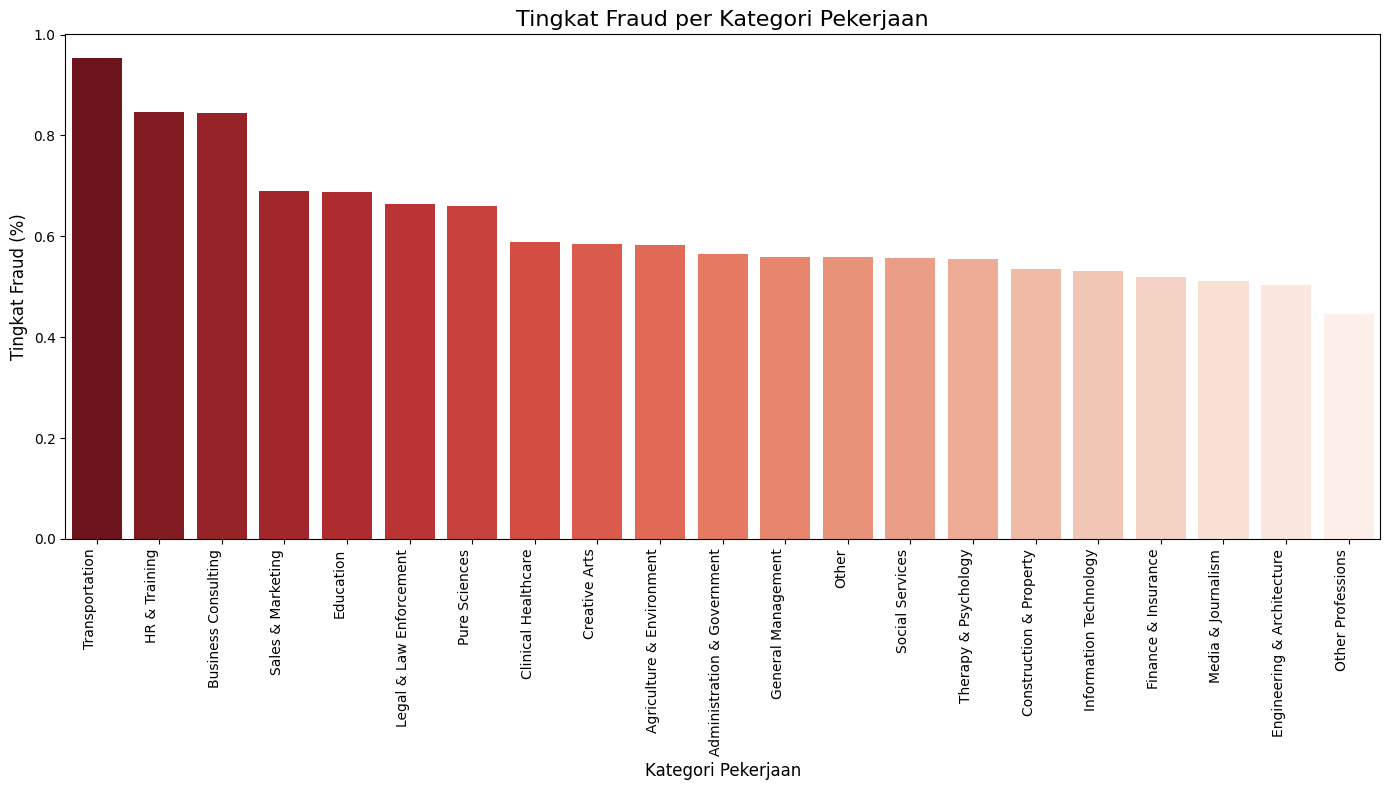


DataFrame dengan kolom 'job_fraud_rate':
  trans_date_trans_time       cc_num                           merchant  \
0   2019-01-01 12:47:15  60416207185  fraud_Jones, Sawayn and Romaguera   
1   2019-01-02 08:44:57  60416207185                    fraud_Berge LLC   
2   2019-01-02 08:47:36  60416207185                 fraud_Luettgen PLC   
3   2019-01-02 12:38:14  60416207185                fraud_Daugherty LLC   
4   2019-01-02 13:10:46  60416207185               fraud_Beier and Sons   

        category    amt gender            street           city state    zip  \
0       misc_net   7.27      F  9886 Anita Drive  Fort Washakie    WY  82514   
1  gas_transport  52.94      F  9886 Anita Drive  Fort Washakie    WY  82514   
2  gas_transport  82.08      F  9886 Anita Drive  Fort Washakie    WY  82514   
3      kids_pets  34.79      F  9886 Anita Drive  Fort Washakie    WY  82514   
4           home  27.18      F  9886 Anita Drive  Fort Washakie    WY  82514   

       lat      long  city

In [43]:
# prompt: tolong buatkan fitur baru yang bernama job_fraud_rate dengan hubungan job dan is_fraud

import pandas as pd
import matplotlib.pyplot as plt
# Membuat kolom kategori pekerjaan berdasarkan mapping yang telah dibuat
train['job_category'] = train['job'].apply(categorize_job)

# Menghitung jumlah total transaksi per kategori pekerjaan
job_counts = train['job_category'].value_counts().reset_index()
job_counts.columns = ['job_category', 'total_transactions']

# Menghitung jumlah transaksi fraud per kategori pekerjaan
fraud_job_counts = train[train['is_fraud'] == 1]['job_category'].value_counts().reset_index()
fraud_job_counts.columns = ['job_category', 'fraud_transactions']

# Menggabungkan kedua dataframe
job_fraud_rate_df = pd.merge(job_counts, fraud_job_counts, on='job_category', how='left').fillna(0)

# Menghitung tingkat fraud (fraud rate) per kategori pekerjaan
job_fraud_rate_df['job_fraud_rate'] = (job_fraud_rate_df['fraud_transactions'] / job_fraud_rate_df['total_transactions']) * 100

# Mengurutkan berdasarkan tingkat fraud tertinggi
job_fraud_rate_df = job_fraud_rate_df.sort_values(by='job_fraud_rate', ascending=False)

# Menampilkan tabel tingkat fraud per kategori pekerjaan
print("Tingkat Fraud per Kategori Pekerjaan:")
print(job_fraud_rate_df)

# Visualisasi tingkat fraud per kategori pekerjaan
plt.figure(figsize=(14, 8))
sns.barplot(x='job_category', y='job_fraud_rate', data=job_fraud_rate_df, palette='Reds_r')
plt.title('Tingkat Fraud per Kategori Pekerjaan', fontsize=16)
plt.xlabel('Kategori Pekerjaan', fontsize=12)
plt.ylabel('Tingkat Fraud (%)', fontsize=12)
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

# Menambahkan kolom 'job_fraud_rate' ke dataframe utama 'train'
# Merge tingkat fraud kembali ke dataframe utama
train = pd.merge(train, job_fraud_rate_df[['job_category', 'job_fraud_rate']], on='job_category', how='left')

# Menampilkan beberapa baris pertama untuk memeriksa kolom baru
print("\nDataFrame dengan kolom 'job_fraud_rate':")
print(train.head())


### Category

        category  is_fraud  category_fraud_rate
0       misc_net         0             0.014458
1  gas_transport         0             0.004694
2  gas_transport         0             0.004694
3      kids_pets         0             0.002114
4           home         0             0.001608

Top 10 Categories by Fraud Rate:
         category  total_transactions  fraud_transactions  category_fraud_rate
5    shopping_net               97543                1713             0.017561
11       misc_net               63287                 915             0.014458
1     grocery_pos              123638                1743             0.014098
3    shopping_pos              116672                 843             0.007225
0   gas_transport              131659                 618             0.004694
10       misc_pos               79655                 250             0.003139
12    grocery_net               45452                 134             0.002948
13         travel               40507         

/tmp/ipython-input-44-3089385503.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='category_fraud_rate', y='category', data=category_fraud_rates.head(n_top), palette='Reds_r')


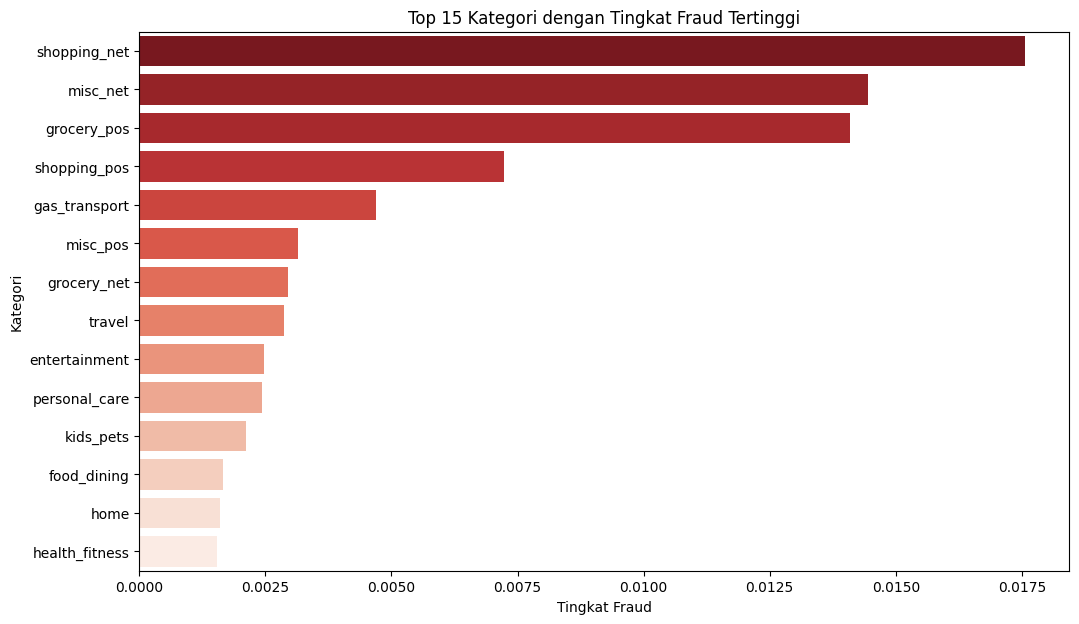

In [44]:
# prompt: bikinkan fitur baru category fraud rate dengan fitur asalnya category dan is_fraud

import pandas as pd
import matplotlib.pyplot as plt
# Hitung total transaksi per kategori
category_counts = train['category'].value_counts().reset_index()
category_counts.columns = ['category', 'total_transactions']

# Hitung jumlah transaksi fraud per kategori
fraud_category_counts = train[train['is_fraud'] == 1]['category'].value_counts().reset_index()
fraud_category_counts.columns = ['category', 'fraud_transactions']

# Gabungkan data
category_fraud_rates = pd.merge(category_counts, fraud_category_counts, on='category', how='left').fillna(0)

# Hitung fraud rate per kategori
category_fraud_rates['category_fraud_rate'] = (category_fraud_rates['fraud_transactions'] / category_fraud_rates['total_transactions'])

# Urutkan berdasarkan fraud rate (opsional, untuk analisis)
category_fraud_rates = category_fraud_rates.sort_values(by='category_fraud_rate', ascending=False)

# Gabungkan fraud rate kembali ke dataframe train
train = pd.merge(train, category_fraud_rates[['category', 'category_fraud_rate']], on='category', how='left')

print(train[['category', 'is_fraud', 'category_fraud_rate']].head())
print("\nTop 10 Categories by Fraud Rate:")
print(category_fraud_rates.head(10))

# Visualisasi Fraud Rate per Kategori (Top N)
n_top = 15  # Tampilkan top 15 kategori
plt.figure(figsize=(12, 7))
sns.barplot(x='category_fraud_rate', y='category', data=category_fraud_rates.head(n_top), palette='Reds_r')
plt.title(f'Top {n_top} Kategori dengan Tingkat Fraud Tertinggi')
plt.xlabel('Tingkat Fraud')
plt.ylabel('Kategori')
plt.show()

# Train Test Split

In [45]:
train.head()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,trans_time,year,month,day,day_of_week,hour,risk_category_of_hour,distance,distance_category,Age,gender_encoded,is_high_amount,is_night_transaction,transaction_count_daily,prev_time,time_diff_minutes,is_high_frequency,log_amt,job_category,job_fraud_rate,category_fraud_rate
0,2019-01-01 12:47:15,60416207185,"fraud_Jones, Sawayn and Romaguera",misc_net,7.27,F,9886 Anita Drive,Fort Washakie,WY,82514,43.0048,-108.8964,1645,Information systems manager,1986-02-17,98e3dcf98101146a577f85a34e58feec,1325422035,43.974711,-109.741904,0,2019-01-01,12:47:15,2019,1,1,1,12,1,127.606239,3,32,0,0,0,1,NaT,NaN,0,2.112635,General Management,0.559574,0.014458
1,2019-01-02 08:44:57,60416207185,fraud_Berge LLC,gas_transport,52.94,F,9886 Anita Drive,Fort Washakie,WY,82514,43.0048,-108.8964,1645,Information systems manager,1986-02-17,498120fc45d277f7c88e3dba79c33865,1325493897,42.018766,-109.044172,0,2019-01-02,08:44:57,2019,1,2,2,8,1,110.308921,3,32,0,0,0,4,2019-01-01 12:47:15,1197.700000,0,3.987872,General Management,0.559574,0.004694
2,2019-01-02 08:47:36,60416207185,fraud_Luettgen PLC,gas_transport,82.08,F,9886 Anita Drive,Fort Washakie,WY,82514,43.0048,-108.8964,1645,Information systems manager,1986-02-17,95f514bb993151347c7acdf8505c3d62,1325494056,42.961335,-109.157564,0,2019-01-02,08:47:36,2019,1,2,2,8,1,21.787261,1,32,0,0,0,4,2019-01-02 08:44:57,2.650000,1,4.419804,General Management,0.559574,0.004694
3,2019-01-02 12:38:14,60416207185,fraud_Daugherty LLC,kids_pets,34.79,F,9886 Anita Drive,Fort Washakie,WY,82514,43.0048,-108.8964,1645,Information systems manager,1986-02-17,4f0c1a14e0aa7eb56a490780ef9268c5,1325507894,42.228227,-108.747683,0,2019-01-02,12:38:14,2019,1,2,2,12,1,87.204215,2,32,0,0,0,4,2019-01-02 08:47:36,230.633333,0,3.577669,General Management,0.559574,0.002114
4,2019-01-02 13:10:46,60416207185,fraud_Beier and Sons,home,27.18,F,9886 Anita Drive,Fort Washakie,WY,82514,43.0048,-108.8964,1645,Information systems manager,1986-02-17,3b2ebd3af508afba959640893e1e82bc,1325509846,43.321745,-108.091143,0,2019-01-02,13:10:46,2019,1,2,2,13,1,74.212965,2,32,0,0,0,4,2019-01-02 12:38:14,32.533333,0,3.338613,General Management,0.559574,0.001608


In [46]:
train.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop',
       'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long',
       'is_fraud', 'trans_date', 'trans_time', 'year', 'month', 'day',
       'day_of_week', 'hour', 'risk_category_of_hour', 'distance',
       'distance_category', 'Age', 'gender_encoded', 'is_high_amount',
       'is_night_transaction', 'transaction_count_daily', 'prev_time',
       'time_diff_minutes', 'is_high_frequency', 'log_amt', 'job_category',
       'job_fraud_rate', 'category_fraud_rate'],
      dtype='object')

In [47]:
train.drop(['trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'gender', 'street', 'city', 'state', 'zip', 'lat', 'long',
       'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'trans_date', 'trans_time', 'year', 'prev_time',  'job_category'
       ], inplace=True, axis=1)

In [48]:
train.head()

,amt,city_pop,is_fraud,month,day,day_of_week,hour,risk_category_of_hour,distance,distance_category,Age,gender_encoded,is_high_amount,is_night_transaction,transaction_count_daily,time_diff_minutes,is_high_frequency,log_amt,job_fraud_rate,category_fraud_rate
0,7.27,1645,0,1,1,1,12,1,127.606239,3,32,0,0,0,1,NaN,0,2.112635,0.559574,0.014458
1,52.94,1645,0,1,2,2,8,1,110.308921,3,32,0,0,0,4,1197.700000,0,3.987872,0.559574,0.004694
2,82.08,1645,0,1,2,2,8,1,21.787261,1,32,0,0,0,4,2.650000,1,4.419804,0.559574,0.004694
3,34.79,1645,0,1,2,2,12,1,87.204215,2,32,0,0,0,4,230.633333,0,3.577669,0.559574,0.002114
4,27.18,1645,0,1,2,2,13,1,74.212965,2,32,0,0,0,4,32.533333,0,3.338613,0.559574,0.001608


In [49]:
train.isnull().sum()/len(train)

,0
amt,0.000000
city_pop,0.000000
is_fraud,0.000000
month,0.000000
day,0.000000
day_of_week,0.000000
hour,0.000000
risk_category_of_hour,0.000000
distance,0.000000
distance_category,0.000000


In [50]:
# prompt: handling missing value pada kolom time_diff_minutes dengan median

train['time_diff_minutes'].fillna(train['time_diff_minutes'].median(), inplace=True)
train.isnull().sum()/len(train)

/tmp/ipython-input-50-1349035435.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['time_diff_minutes'].fillna(train['time_diff_minutes'].median(), inplace=True)


,0
amt,0.0
city_pop,0.0
is_fraud,0.0
month,0.0
day,0.0
day_of_week,0.0
hour,0.0
risk_category_of_hour,0.0
distance,0.0
distance_category,0.0


Jangan lupa pakai stratify = y

In [51]:
from sklearn.model_selection import train_test_split

x, y = train.drop(columns=['is_fraud']), train['is_fraud']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

## Original Data

### Correlation to Fraud

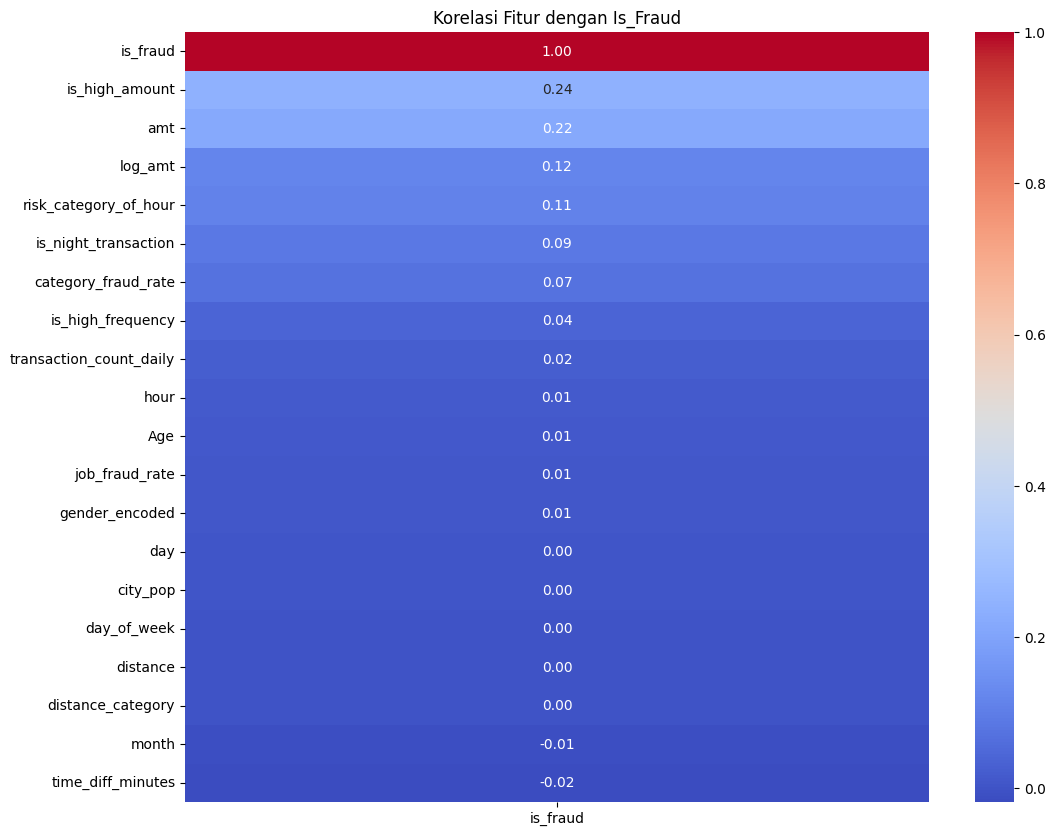

In [52]:
# prompt: Buatkan correlation heatmap terhadap is_fraud

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))
sns.heatmap(train.corr(numeric_only=True)[['is_fraud']].sort_values(by='is_fraud', ascending=False), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Fitur dengan Is_Fraud')
plt.show()

#### Standard Scaling dan Min-Max Scaling

In [53]:
# from sklearn.preprocessing import MinMaxScaler

# # Identifikasi kolom numerik yang akan di-scale
# # Pastikan kolom 'Age' dan 'amt' ada di x_train
# numeric_cols_to_scale = ['amt', 'Age']

# # Buat instance MinMaxScaler
# scaler = MinMaxScaler()

# # Lakukan fit dan transform pada data training
# # Hanya pilih kolom numerik dari x_train untuk scaling
# x_train[numeric_cols_to_scale] = scaler.fit_transform(x_train[numeric_cols_to_scale])

# # Lakukan transform pada data testing (menggunakan scaler yang sama dari data training)
# # Hanya pilih kolom numerik dari x_test untuk scaling
# x_test[numeric_cols_to_scale] = scaler.transform(x_test[numeric_cols_to_scale])

# print("x_train setelah Min-Max Scaling:")
# print(x_train.head())

# print("\nx_test setelah Min-Max Scaling:")
# print(x_test.head())

In [54]:
is_fraud_count = train['is_fraud'].value_counts(normalize=True)

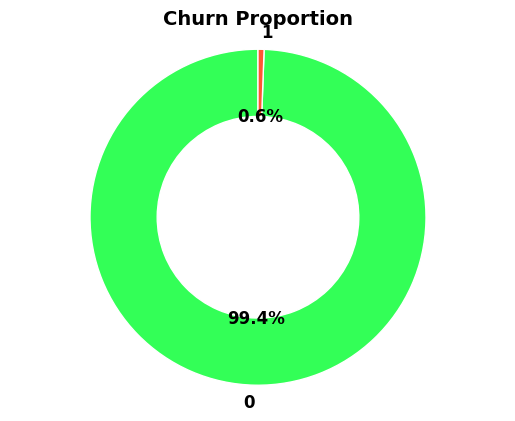

In [55]:
colors = [ '#33FF57','#FF5733']  # Red for churn, Green for not churn

fig, ax = plt.subplots()

# Plot the donut chart
wedges, texts, autotexts = ax.pie(
    is_fraud_count, labels=is_fraud_count.index, autopct='%1.1f%%', colors=colors, startangle=90,
    wedgeprops=dict(width=0.4, edgecolor='w')
)

ax.set_title("Churn Proportion", fontsize=14, fontweight='bold')

for text, autotext in zip(texts, autotexts):
    text.set(fontsize=12, fontweight='bold')
    autotext.set(fontsize=12, fontweight='bold')

centre_circle = plt.Circle((0, 0), 0.30, color='white', linewidth=0)
ax.add_artist(centre_circle)

ax.axis('equal')

plt.show()

data sangat imbalance, extreme

## Handling Imbalance Data (Training Data)

Hanya data train aja yang boleh di Handling Imbalance

### SMOTE

In [56]:
# prompt: buatkan smothe untuk data train di atas jangan eror woi

from imblearn.over_sampling import SMOTE

# Inisialisasi SMOTE
smote = SMOTE(random_state=42)

# Terapkan SMOTE hanya pada data training
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

print("Jumlah kelas setelah SMOTE:")
print(y_train_smote.value_counts())


Jumlah kelas setelah SMOTE:
is_fraud
0    1031335
1    1031335
Name: count, dtype: int64


In [57]:
# prompt: buatkan smote untuk data train diatas! jangan eror ya

!pip install imbalanced-learn

from imblearn.over_sampling import SMOTE

# Buat instance SMOTE
smote = SMOTE(random_state=42)

# Terapkan SMOTE hanya pada data training
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

# Cek distribusi kelas setelah SMOTE
print("Distribusi kelas pada y_train setelah SMOTE:")
print(y_train_smote.value_counts())

# Cek jumlah data setelah SMOTE
print("\nJumlah data setelah SMOTE:", len(x_train_smote))

Distribusi kelas pada y_train setelah SMOTE:
is_fraud
0    1031335
1    1031335
Name: count, dtype: int64

Jumlah data setelah SMOTE: 2062670


In [58]:
# # Identifikasi kolom kategorikal yang tersisa di x_train (setelah drop identifier)
# # Kolom 'job' adalah satu-satunya kolom kategorikal yang tersisa berdasarkan kode Anda sebelumnya.
# categorical_cols = ['job'] # Anda mungkin perlu menyesuaikan ini jika ada kolom kategorikal lain yang tersisa

# # Gunakan Label Encoding untuk kolom kategorikal
# # Buat instance LabelEncoder
# le_job = LabelEncoder()

# # Terapkan Label Encoding pada data training
# # Pastikan kolom 'job' ada di x_train sebelum di-encode
# x_train['job'] = le_job.fit_transform(x_train['job'])

# # Terapkan Label Encoding pada data testing (menggunakan encoder yang sama dari data training)
# # Pastikan kolom 'job' ada di x_test sebelum di-encode
# x_test['job'] = le_job.transform(x_test['job']) # Gunakan transform(), bukan fit_transform()

# print("\nx_train setelah Label Encoding 'job':")
# print(x_train.head())

# print("\nx_test setelah Label Encoding 'job':")
# print(x_test.head())

# # Setelah mengonversi kolom 'job' menjadi numerik, Anda bisa menerapkan SMOTE.
# # Buat instance SMOTE
# smote = SMOTE(random_state=42)

# # Terapkan SMOTE hanya pada data training yang sudah di-encoded dan di-scaled
# x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

# # Cek distribusi kelas setelah SMOTE
# print("\nDistribusi kelas pada y_train setelah SMOTE:")
# print(y_train_smote.value_counts())

# # Cek jumlah data setelah SMOTE
# print("\nJumlah data setelah SMOTE:", len(x_train_smote))



Class distribution after SMOTE:
is_fraud
0    1031335
1    1031335
Name: count, dtype: int64


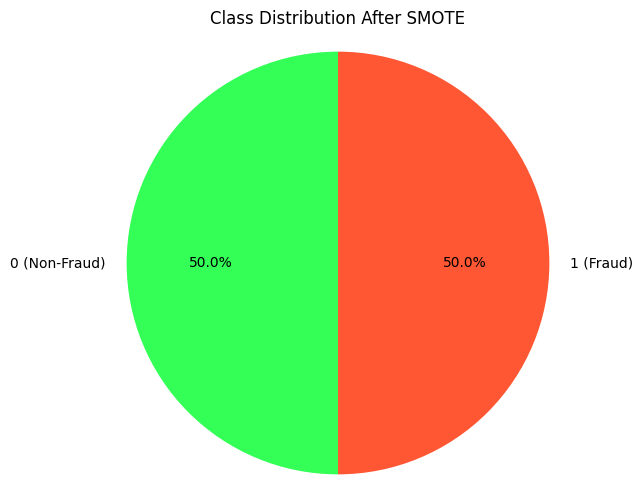

In [59]:

import matplotlib.pyplot as plt
smote= SMOTE(sampling_strategy='minority', random_state=42) # Added random_state for reproducibility
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

# Check the new class distribution
print("Class distribution after SMOTE:")
print(y_train_smote.value_counts())

# Optional: Visualize the new distribution
plt.figure(figsize=(6, 6))
y_train_smote.value_counts().plot.pie(labels=['0 (Non-Fraud)', '1 (Fraud)'], autopct='%1.1f%%', startangle=90, colors=['#33FF57','#FF5733'])
plt.title('Class Distribution After SMOTE')
plt.ylabel('') # Remove the default ylabel for pie chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [60]:
y_train_smote.value_counts()

,count
is_fraud,
0,1031335
1,1031335


In [61]:
y_train.value_counts(
)

,count
is_fraud,
0,1031335
1,6005


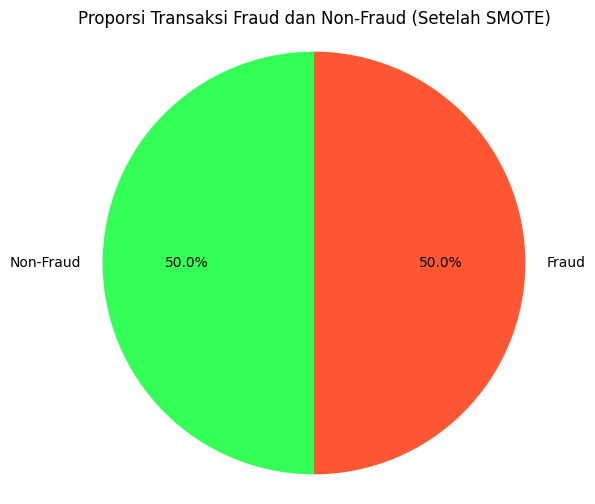

In [62]:

import matplotlib.pyplot as plt
# Menghitung jumlah transaksi fraud dan non-fraud setelah SMOTE
smote_fraud_counts = y_train_smote.value_counts()

# Membuat pie chart untuk data setelah SMOTE
plt.figure(figsize=(6, 6))
plt.pie(smote_fraud_counts, labels=['Non-Fraud', 'Fraud'], autopct='%1.1f%%', startangle=90, colors=['#33FF57', '#FF5733'])
plt.title('Proporsi Transaksi Fraud dan Non-Fraud (Setelah SMOTE)')
plt.axis('equal')  # Membuat pie chart berbentuk lingkaran
plt.show()


### ADASYN

In [63]:
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(random_state=42)
x_train_adasyn, y_train_adasyn = adasyn.fit_resample(x_train, y_train)

In [64]:
y_train_adasyn.value_counts()

,count
is_fraud,
0,1031335
1,1031247


# Modelling

In [65]:
# Import Library

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

## Logistics Regression

Logistic Regression with Original data

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Model dasar
lr = LogisticRegression(random_state=42)
lr.fit(x_train, y_train)

# Prediksi dan evaluasi
y_pred_lr = lr.predict(x_test)
print("Logistic Regression (Default)")
print(classification_report(y_test, y_pred_lr))

Logistic Regression (Default)
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    257834
           1       0.01      0.00      0.00      1501

    accuracy                           0.99    259335
   macro avg       0.50      0.50      0.50    259335
weighted avg       0.99      0.99      0.99    259335



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression for SMOTE

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Model dasar
lr_smote = LogisticRegression(random_state=42)
lr_smote.fit(x_train_smote, y_train_smote)

# Prediksi dan evaluasi
y_pred_lr = lr_smote.predict(x_test)
print("Logistic Regression (Default)")
print(classification_report(y_test, y_pred_lr))

Logistic Regression (Default)
              precision    recall  f1-score   support

           0       1.00      0.93      0.97    257834
           1       0.06      0.75      0.12      1501

    accuracy                           0.93    259335
   macro avg       0.53      0.84      0.54    259335
weighted avg       0.99      0.93      0.96    259335



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression for ADASYN

In [68]:
# Logistic Regression for ADASYN

# Model dasar
lr_adasyn = LogisticRegression(max_iter=1000, random_state=42)
lr_adasyn.fit(x_train_adasyn, y_train_adasyn)

# Prediksi dan evaluasi
y_pred_lr_adasyn = lr_adasyn.predict(x_test)
print("Logistic Regression (ADASYN)")
print(classification_report(y_test, y_pred_lr_adasyn))

Logistic Regression (ADASYN)
              precision    recall  f1-score   support

           0       1.00      0.89      0.94    257834
           1       0.04      0.78      0.07      1501

    accuracy                           0.89    259335
   macro avg       0.52      0.84      0.51    259335
weighted avg       0.99      0.89      0.94    259335



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression for SMOTE by prompt AI

In [69]:
# # prompt: buatkan model logistic regression untuk y_train dan x_train dipredik dengan y_test dan x_test

# import matplotlib.pyplot as plt
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

# # Inisialisasi model Logistic Regression
# log_reg_model = LogisticRegression(random_state=42)

# # Latih model pada data training yang telah di-SMOTE (atau original, tergantung strategi)
# # Menggunakan data SMOTE karena data imbalance
# log_reg_model.fit(x_train_smote, y_train_smote)

# # Lakukan prediksi pada data test
# y_pred_log_reg = log_reg_model.predict(x_test)

# # Evaluasi model
# print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
# print("\nClassification Report:\n", classification_report(y_test, y_pred_log_reg))
# print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))

# # Optional: ROC Curve and AUC
# y_prob_log_reg = log_reg_model.predict_proba(x_test)[:, 1]
# fpr, tpr, thresholds = roc_curve(y_test, y_prob_log_reg)
# roc_auc = auc(fpr, tpr)

# plt.figure()
# plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend(loc="lower right")
# plt.show()


### Hyperparameter Tuning (Optional)

### Hyperparameter

In [86]:
# prompt: make Hyperparameter (bukan hyperparameter tuning) for data original, smote, dan adasyn kemudian perlihatkan hasilnya

# Definisikan hyperparameter untuk Logistic Regression
# Parameter ini akan digunakan untuk semua dataset (original, SMOTE, ADASYN)
lr_params = {
    'C': 1.0, # Regularization strength
    'penalty': 'l2', # Regularization penalty ('l1', 'l2', 'elasticnet', 'none')
    'solver': 'liblinear', # Algorithm to use in the optimization problem
    'max_iter': 1000, # Maximum number of iterations
    'random_state': 42 # Random state for reproducibility
}

# --- Model Logistic Regression dengan Data Original ---
print("Logistic Regression (Data Original) - Using defined hyperparameters")
lr_original = LogisticRegression(**lr_params)
lr_original.fit(x_train, y_train)
y_pred_lr_original = lr_original.predict(x_test)
print(classification_report(y_test, y_pred_lr_original))
print("-" * 50)

# --- Model Logistic Regression dengan Data SMOTE ---
print("Logistic Regression (Data SMOTE) - Using defined hyperparameters")
lr_smote = LogisticRegression(**lr_params)
lr_smote.fit(x_train_smote, y_train_smote)
y_pred_lr_smote = lr_smote.predict(x_test)
print(classification_report(y_test, y_pred_lr_smote))
print("-" * 50)

# --- Model Logistic Regression dengan Data ADASYN ---
print("Logistic Regression (Data ADASYN) - Using defined hyperparameters")
lr_adasyn = LogisticRegression(**lr_params)
lr_adasyn.fit(x_train_adasyn, y_train_adasyn)
y_pred_lr_adasyn = lr_adasyn.predict(x_test)
print(classification_report(y_test, y_pred_lr_adasyn))
print("-" * 50)


Logistic Regression (Data Original) - Using defined hyperparameters
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    257834
           1       0.02      0.00      0.00      1501

    accuracy                           0.99    259335
   macro avg       0.50      0.50      0.50    259335
weighted avg       0.99      0.99      0.99    259335

--------------------------------------------------
Logistic Regression (Data SMOTE) - Using defined hyperparameters
              precision    recall  f1-score   support

           0       1.00      0.91      0.95    257834
           1       0.05      0.81      0.09      1501

    accuracy                           0.91    259335
   macro avg       0.52      0.86      0.52    259335
weighted avg       0.99      0.91      0.95    259335

--------------------------------------------------
Logistic Regression (Data ADASYN) - Using defined hyperparameters
              precision    recall  f1-score  

In [70]:
from sklearn.linear_model import LogisticRegression

# data original
lr = LogisticRegression(random_state=42)
lr.fit(x_train, y_train)

# Prediksi dan evaluasi
y_pred_lr = lr.predict(x_test)
print("Random Forest (Default)")
print(classification_report(y_test, y_pred_lr))

# smote
lr = LogisticRegression(random_state=42)
lr.fit(x_train_smote, y_train_smote)

# Prediksi dan evaluasi
y_pred_lr = lr.predict(x_test)
print("Random Forest (Default)")

# adasyn
lr = LogisticRegression(random_state=42)
lr.fit(x_train_adasyn, y_train_adasyn)

# Prediksi dan evaluasi
y_pred_lr = lr.predict(x_test)
print("Random Forest (Default)")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Random Forest (Default)
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    257834
           1       0.01      0.00      0.00      1501

    accuracy                           0.99    259335
   macro avg       0.50      0.50      0.50    259335
weighted avg       0.99      0.99      0.99    259335



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Random Forest (Default)
Random Forest (Default)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Hyperparameter Tuning SMOTE

In [71]:
# from sklearn.model_selection import GridSearchCV, StratifiedKFold

# param_grid = {
#     'C': [0.01, 0.1, 1, 10],
#     'penalty': ['l2'],
#     'class_weight': ['balanced', None]
# }

# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# grid_lr_smote = GridSearchCV(LogisticRegression(solver='liblinear', random_state=42),
#                              param_grid, cv=cv, scoring='f1', n_jobs=-1)

# grid_lr_smote.fit(x_train_smote, y_train_smote)

# best_lr_smote = grid_lr_smote.best_estimator_
# y_pred_best_lr_smote = best_lr_smote.predict(x_test)

# print("=== Logistic Regression (SMOTE) - Hypertuned ===")
# print("Best Params:", grid_lr_smote.best_params_)
# print(classification_report(y_test, y_pred_best_lr_smote))
# print(confusion_matrix(y_test, y_pred_best_lr_smote))

Hyperparameter Tuning ADASYN

In [72]:
# from sklearn.model_selection import GridSearchCV, StratifiedKFold

# param_grid = {
#     'C': [0.01, 0.1, 1, 10],
#     'penalty': ['l2'],
#     'class_weight': ['balanced', None]
# }

# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# grid_lr_adasyn = GridSearchCV(LogisticRegression(max_iter=1000, solver='liblinear', random_state=42),
#                               param_grid, cv=cv, scoring='f1', n_jobs=-1)

# grid_lr_adasyn.fit(x_train_adasyn, y_train_adasyn)

# # Model terbaik
# best_lr_adasyn = grid_lr_adasyn.best_estimator_
# y_pred_best_lr_adasyn = best_lr_adasyn.predict(x_test)

# # Evaluasi
# print("Best Parameters:", grid_lr_adasyn.best_params_)
# print("Accuracy:", accuracy_score(y_test, y_pred_best_lr_adasyn))
# print("Classification Report:\n", classification_report(y_test, y_pred_best_lr_adasyn))
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best_lr_adasyn))


## RandomForest

Random Forest with Original Data

In [73]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)

# Prediksi dan evaluasi
y_pred_rf = rf.predict(x_test)
print("Random Forest (Default)")
print(classification_report(y_test, y_pred_rf))


Random Forest (Default)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       0.97      0.76      0.85      1501

    accuracy                           1.00    259335
   macro avg       0.98      0.88      0.93    259335
weighted avg       1.00      1.00      1.00    259335



Random Forest for SMOTE

In [87]:
from sklearn.ensemble import RandomForestClassifier

rf_smote = RandomForestClassifier(random_state=42)
rf_smote.fit(x_train_smote, y_train_smote)

# Prediksi dan evaluasi
y_pred_rf = rf_smote.predict(x_test)
print("Random Forest (Default)")
print(classification_report(y_test, y_pred_rf))



Random Forest (Default)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       0.83      0.84      0.84      1501

    accuracy                           1.00    259335
   macro avg       0.92      0.92      0.92    259335
weighted avg       1.00      1.00      1.00    259335



Random Forest for ADASYN

In [88]:
rf_adasyn = RandomForestClassifier(random_state=42)
rf_adasyn.fit(x_train_adasyn, y_train_adasyn)

# Prediksi dan evaluasi
y_pred_rf = rf_adasyn.predict(x_test)
print("Random Forest (Default)")
print(classification_report(y_test, y_pred_rf))

Random Forest (Default)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       0.83      0.84      0.84      1501

    accuracy                           1.00    259335
   macro avg       0.92      0.92      0.92    259335
weighted avg       1.00      1.00      1.00    259335



### Hyperparameter Tuning (Optional)

### Hyperparameter

In [89]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 300, max_depth=30, random_state=42)
rf.fit(x_train, y_train)

# Prediksi dan evaluasi
y_pred_rf = rf.predict(x_test)
print("Random Forest (Default)")
print(classification_report(y_test, y_pred_rf))

#smote

rf = RandomForestClassifier(n_estimators = 300, max_depth=30, random_state=42)
rf.fit(x_train_smote, y_train_smote)

# Prediksi dan evaluasi
y_pred_rf = rf.predict(x_test)
print("Random Forest (Default)")
print(classification_report(y_test, y_pred_rf))

#adasyn

rf = RandomForestClassifier(n_estimators = 300, max_depth=30, random_state=42)
rf.fit(x_train_adasyn, y_train_adasyn)

# Prediksi dan evaluasi
y_pred_rf = rf.predict(x_test)
print("Random Forest (Default)")
print(classification_report(y_test, y_pred_rf))

Random Forest (Default)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       0.97      0.76      0.85      1501

    accuracy                           1.00    259335
   macro avg       0.98      0.88      0.93    259335
weighted avg       1.00      1.00      1.00    259335

Random Forest (Default)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       0.82      0.85      0.83      1501

    accuracy                           1.00    259335
   macro avg       0.91      0.92      0.92    259335
weighted avg       1.00      1.00      1.00    259335



KeyboardInterrupt: 

Hyperparameter Tuni for Random Forest SMOTE

In [77]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# # Inisialisasi model
# # Using a distinct name for the SMOTE Random Forest model
# rf = RandomForestClassifier(random_state=42)

# # Define a param_grid specifically for RandomForestClassifier
# param_grid_rf = {
#     'n_estimators': [50, 100, 200],  # Example values for number of trees
#     'max_depth': [None, 10, 20],     # Example values for max depth
#     'min_samples_split': [2, 5, 10], # Example values for min samples split
#     'min_samples_leaf': [1, 2, 4]    # Example values for min samples leaf
# }

# # Hypertuning via GridSearchCV
# # Use the new param_grid_rf
# grid_rf_smote = GridSearchCV(rf, param_grid_rf, cv=3, scoring='f1', verbose=1, n_jobs=-1)
# grid_rf_smote.fit(x_train_smote, y_train_smote)

# # Evaluasi pada data test
# best_rf_smote = grid_rf_smote.best_estimator_
# y_pred_rf_smote = best_rf_smote.predict(x_test)

# print("=== Random Forest (SMOTE) - Hypertuned ===")
# print("Best Params:", grid_rf_smote.best_params_)
# print("Accuracy:", accuracy_score(y_test, y_pred_rf_smote))
# print("Classification Report:\n", classification_report(y_test, y_pred_rf_smote))
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_smote))


Hyperparameter Tuning for ADASYN

In [78]:
# # Ulangi grid search tapi untuk ADASYN
# grid_rf_adasyn = GridSearchCV(rf, param_grid, cv=3, scoring='f1', verbose=1, n_jobs=-1)
# grid_rf_adasyn.fit(x_train_adasyn, y_train_adasyn)

# # Evaluasi pada data test
# best_rf_adasyn = grid_rf_adasyn.best_estimator_
# y_pred_rf_adasyn = best_rf_adasyn.predict(x_test)

# print("=== Random Forest (ADASYN) - Hypertuned ===")
# print("Best Params:", grid_rf_adasyn.best_params_)
# print("Accuracy:", accuracy_score(y_test, y_pred_rf_adasyn))
# print("Classification Report:\n", classification_report(y_test, y_pred_rf_adasyn))
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_adasyn))


## XGBoost



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:39:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


=== XGBoost (Original Data) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       0.66      0.97      0.78      1501

    accuracy                           1.00    259335
   macro avg       0.83      0.98      0.89    259335
weighted avg       1.00      1.00      1.00    259335

Confusion Matrix:
 [[257070    764]
 [    46   1455]]


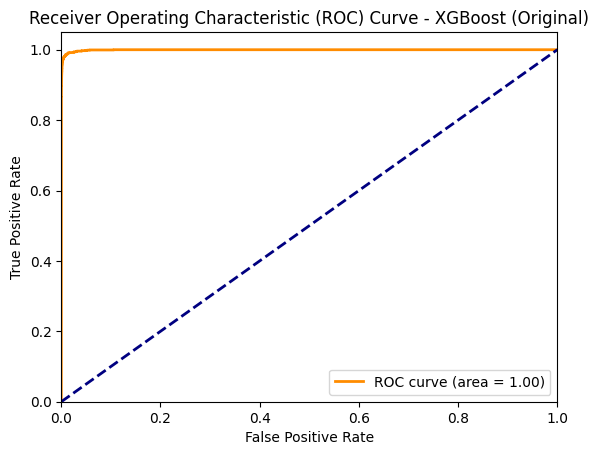

In [79]:
# prompt: Buatkan model XGboost dari data train

import matplotlib.pyplot as plt
# Ensure these imports are not commented out if they are needed
# from sklearn.metrics import roc_curve, auc
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc # Import necessary metrics

# Inisialisasi model XGBoost
# Menggunakan scale_pos_weight untuk menangani imbalance data secara internal
# scale_pos_weight = count(negative class) / count(positive class)
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]

# Add enable_categorical=True to handle categorical features in the DataFrame
xgb_model = XGBClassifier(random_state=42, scale_pos_weight=scale_pos_weight, use_label_encoder=False, eval_metric='logloss', enable_categorical=True)

# Latih model pada data training original
xgb_model.fit(x_train, y_train)

# Prediksi pada data test
y_pred_xgb = xgb_model.predict(x_test)

# Evaluasi model
print("=== XGBoost (Original Data) ===")
print(classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

# ROC Curve and AUC (Optional)
y_prob_xgb = xgb_model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_xgb)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - XGBoost (Original)')
plt.legend(loc="lower right")
plt.show()

# # XGBoost with SMOTE data
# # Inisialisasi model XGBoost
# # Tidak perlu scale_pos_weight karena SMOTE sudah menyeimbangkan
# xgb_model_smote = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', enable_categorical=True) # Add enable_categorical=True

# # Latih model pada data training yang telah di-SMOTE
# xgb_model_smote.fit(x_train_smote, y_train_smote)

# # Prediksi pada data test
# y_pred_xgb_smote = xgb_model_smote.predict(x_test)

# # Evaluasi model
# print("\n=== XGBoost (SMOTE Data) ===")
# print(classification_report(y_test, y_pred_xgb_smote))
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb_smote))

# # ROC Curve and AUC (Optional)
# y_prob_xgb_smote = xgb_model_smote.predict_proba(x_test)[:, 1]
# fpr_smote, tpr_smote, thresholds_smote = roc_curve(y_test, y_prob_xgb_smote)
# roc_auc_smote = auc(fpr_smote, tpr_smote)

# plt.figure()
# plt.plot(fpr_smote, tpr_smote, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_smote)
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve - XGBoost (SMOTE)')
# plt.legend(loc="lower right")
# plt.show()


# # XGBoost with ADASYN data
# # Inisialisasi model XGBoost
# # Tidak perlu scale_pos_weight karena ADASYN sudah menyeimbangkan
# xgb_model_adasyn = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', enable_categorical=True) # Add enable_categorical=True

# # Latih model pada data training yang telah di-ADASYN
# xgb_model_adasyn.fit(x_train_adasyn, y_train_adasyn)

# # Prediksi pada data test
# y_pred_xgb_adasyn = xgb_model_adasyn.predict(x_test)

# # Evaluasi model
# print("\n=== XGBoost (ADASYN Data) ===")
# print(classification_report(y_test, y_pred_xgb_adasyn))
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb_adasyn))

# # ROC Curve and AUC (Optional)
# y_prob_xgb_adasyn = xgb_model_adasyn.predict_proba(x_test)[:, 1]
# fpr_adasyn, tpr_adasyn, thresholds_adasyn = roc_curve(y_test, y_prob_xgb_adasyn)
# roc_auc_adasyn = auc(fpr_adasyn, tpr_adasyn)

# plt.figure()
# plt.plot(fpr_adasyn, tpr_adasyn, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_adasyn)
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve - XGBoost (ADASYN)')
# plt.legend(loc="lower right")
# plt.show()



# Model Comparison

Bandingkan performa Random Forest vs Logistic Regression vs XGBoost

Lakukan rekomendasi model akhir terbaik

In [80]:
# prompt: Bandingkan performa Random Forest vs Logistic Regression vs XGBoost. Lakukan rekomendasi model akhir terbaik

import pandas as pd
# Dictionary untuk menyimpan hasil evaluasi
model_performance = {}

# Evaluasi Logistic Regression (dengan data original)
lr_report = classification_report(y_test, y_pred_lr, output_dict=True)
model_performance['Logistic Regression (Original)'] = {
    'Precision (Fraud)': lr_report['1']['precision'],
    'Recall (Fraud)': lr_report['1']['recall'],
    'F1-Score (Fraud)': lr_report['1']['f1-score'],
    'Accuracy': lr_report['accuracy'],
    'AUC-ROC': roc_auc_score(y_test, lr.predict_proba(x_test)[:, 1])
}

# Evaluasi Random Forest (dengan data original)
rf_report = classification_report(y_test, y_pred_rf, output_dict=True)
model_performance['Random Forest (Original)'] = {
    'Precision (Fraud)': rf_report['1']['precision'],
    'Recall (Fraud)': rf_report['1']['recall'],
    'F1-Score (Fraud)': rf_report['1']['f1-score'],
    'Accuracy': rf_report['accuracy'],
    'AUC-ROC': roc_auc_score(y_test, rf.predict_proba(x_test)[:, 1])
}

# Evaluasi XGBoost (dengan data original dan scale_pos_weight)
xgb_report = classification_report(y_test, y_pred_xgb, output_dict=True)
model_performance['XGBoost (Original + Scale Weight)'] = {
    'Precision (Fraud)': xgb_report['1']['precision'],
    'Recall (Fraud)': xgb_report['1']['recall'],
    'F1-Score (Fraud)': xgb_report['1']['f1-score'],
    'Accuracy': xgb_report['accuracy'],
    'AUC-ROC': roc_auc_score(y_test, xgb_model.predict_proba(x_test)[:, 1])
}

# Tampilkan tabel perbandingan
performance_df = pd.DataFrame(model_performance).T
print("\nPerbandingan Performa Model:")
print(performance_df)

# Rekomendasi Model Akhir
print("\nRekomendasi Model Akhir:")
# Pertimbangkan metrik yang paling penting untuk deteksi fraud, seperti Recall (kemampuan mendeteksi fraud) dan F1-Score (keseimbangan Precision dan Recall). AUC-ROC juga penting untuk membandingkan kemampuan diskriminasi model.

# Urutkan model berdasarkan F1-Score Fraud (atau metrik lain yang relevan)
best_model_name = performance_df['F1-Score (Fraud)'].idxmax()

print(f"\nModel dengan F1-Score (Fraud) tertinggi adalah: {best_model_name}")
print(f"Metrik Performa Model Rekomendasi ({best_model_name}):")
print(performance_df.loc[best_model_name])

# Berikan justifikasi untuk rekomendasi
print("\nJustifikasi Rekomendasi:")
print("Dalam kasus deteksi fraud, meminimalkan False Negatives (fraud yang tidak terdeteksi) sangat penting.")
print("Oleh karena itu, Recall (kemampuan model untuk menemukan semua transaksi fraud) adalah metrik kunci.")
print("F1-Score memberikan keseimbangan antara Precision (akurasi prediksi positif) dan Recall.")
print("AUC-ROC mengukur kemampuan model untuk membedakan antara kelas positif (fraud) dan negatif (non-fraud).")
print(f"\nBerdasarkan perbandingan metrik (terutama F1-Score, Recall, dan AUC-ROC), model '{best_model_name}' menunjukkan performa terbaik dalam mendeteksi transaksi fraud pada dataset ini.")




Perbandingan Performa Model:
                                   Precision (Fraud)  Recall (Fraud)  \
Logistic Regression (Original)              0.051539        0.766156   
Random Forest (Original)                    0.965430        0.762825   
XGBoost (Original + Scale Weight)           0.655701        0.969354   

                                   F1-Score (Fraud)  Accuracy   AUC-ROC  
Logistic Regression (Original)             0.096582  0.917042  0.856405  
Random Forest (Original)                   0.852252  0.998469  0.995061  
XGBoost (Original + Scale Weight)          0.782258  0.996877  0.999383  

Rekomendasi Model Akhir:

Model dengan F1-Score (Fraud) tertinggi adalah: Random Forest (Original)
Metrik Performa Model Rekomendasi (Random Forest (Original)):
Precision (Fraud)    0.965430
Recall (Fraud)       0.762825
F1-Score (Fraud)     0.852252
Accuracy             0.998469
AUC-ROC              0.995061
Name: Random Forest (Original), dtype: float64

Justifikasi Rekomendasi:


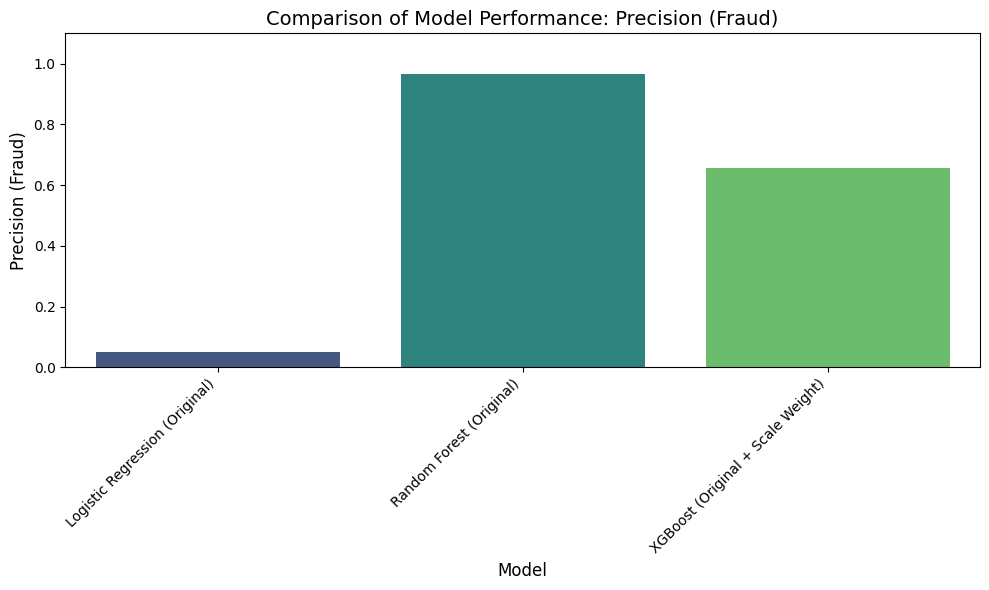

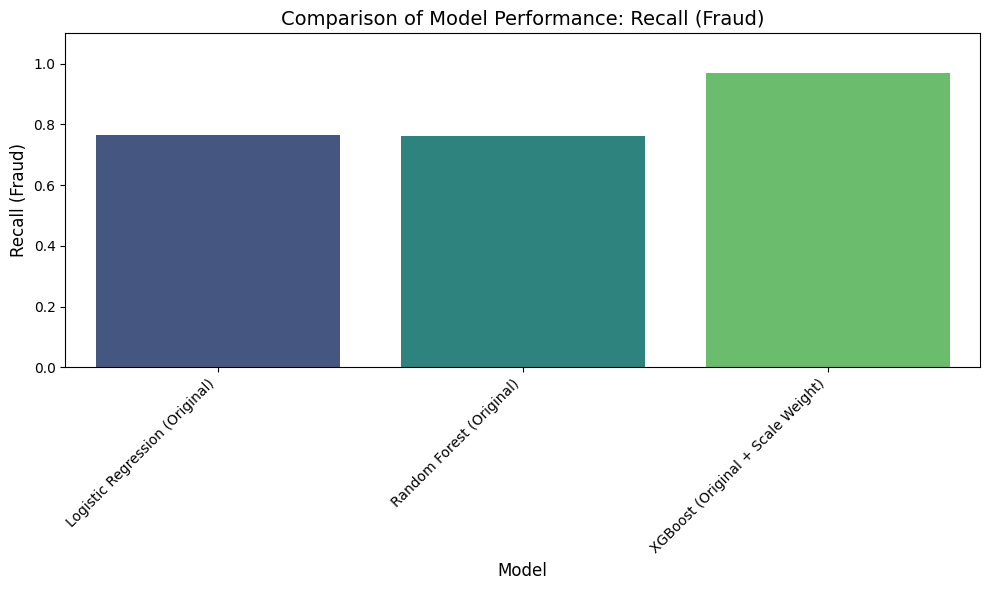

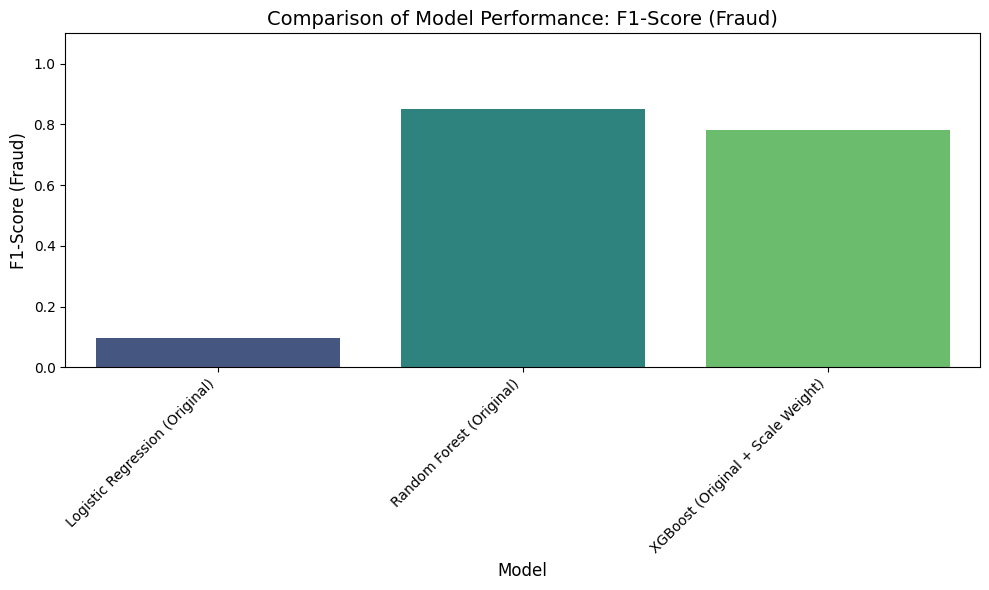

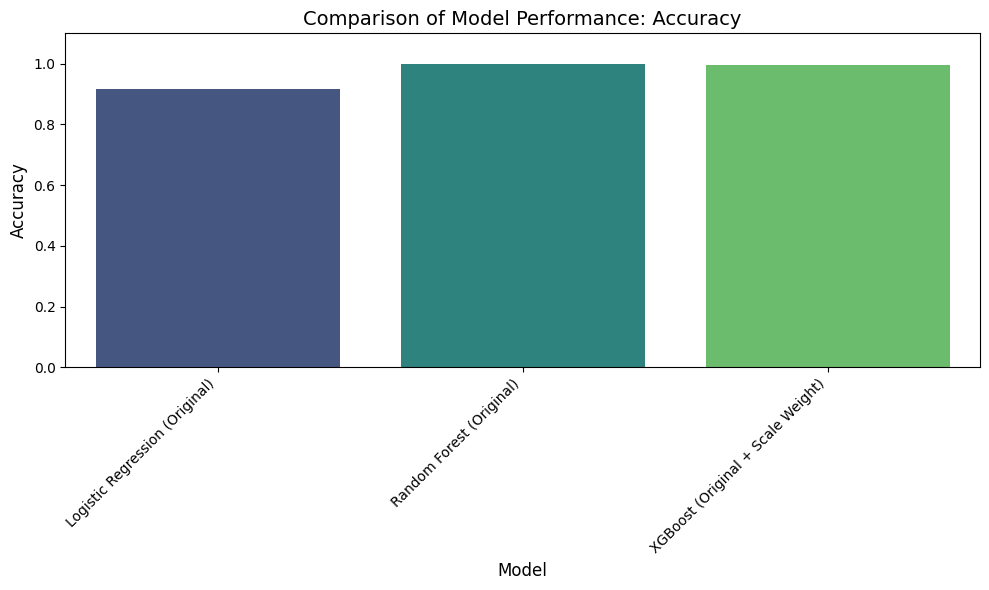

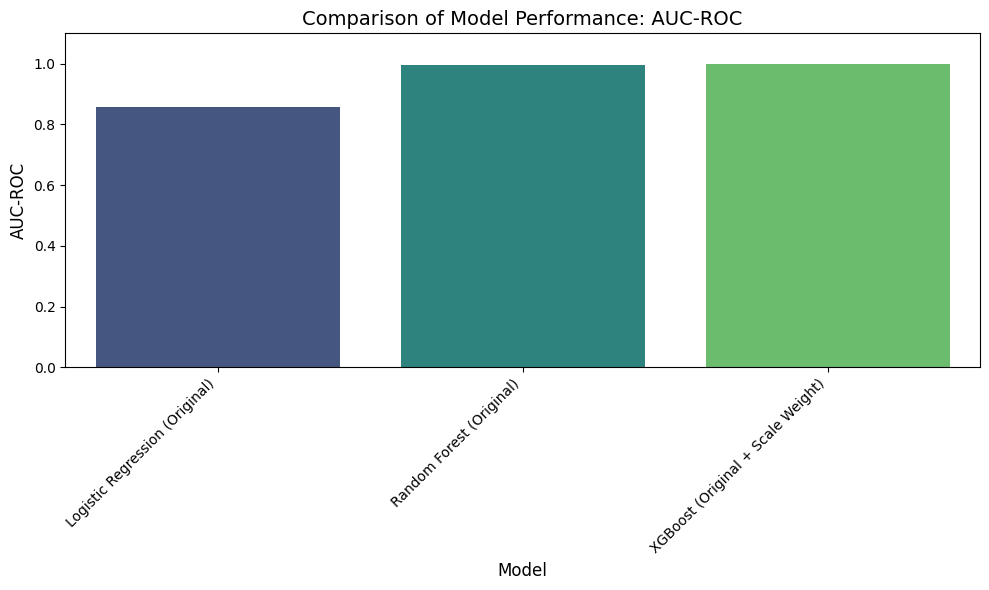


Confusion Matrix for Recommended Model (XGBoost Original + Scale Weight):


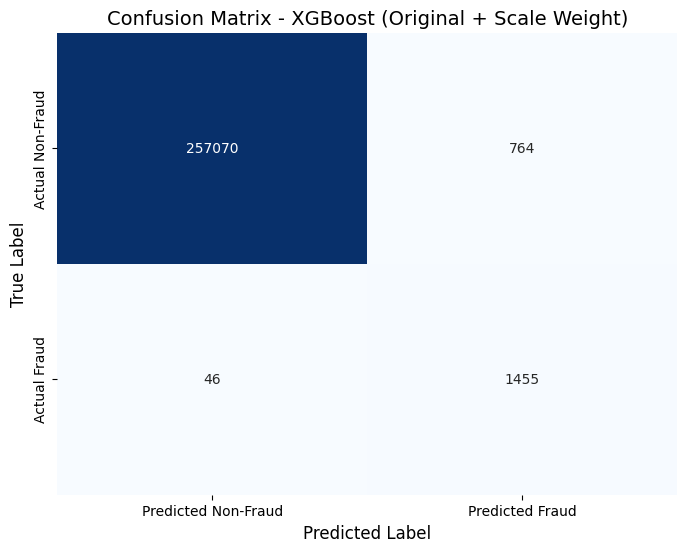

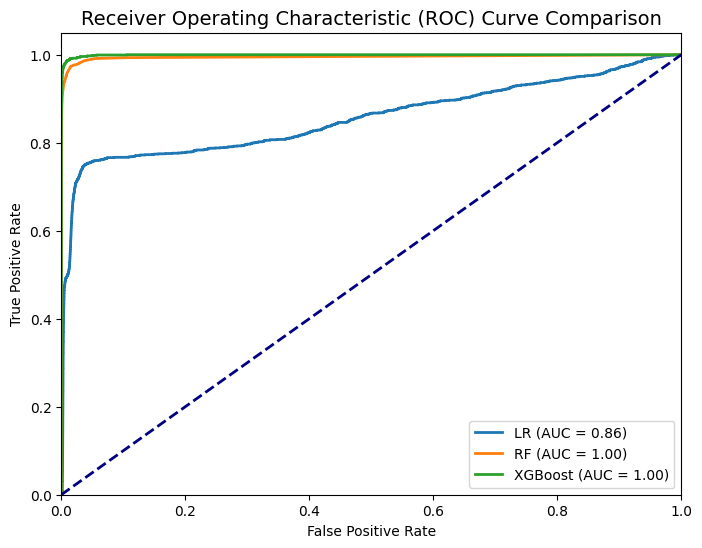

In [81]:
# prompt: visualisasikan performa model

import matplotlib.pyplot as plt
# Visualisasi Perbandingan Performa Model
performance_df_melted = performance_df.reset_index().melt(id_vars='index', var_name='Metric', value_name='Score')
performance_df_melted.rename(columns={'index': 'Model'}, inplace=True)

metrics_to_plot = ['Precision (Fraud)', 'Recall (Fraud)', 'F1-Score (Fraud)', 'Accuracy', 'AUC-ROC']

for metric in metrics_to_plot:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Model', y='Score', hue='Model', data=performance_df_melted[performance_df_melted['Metric'] == metric], palette='viridis')
    plt.title(f'Comparison of Model Performance: {metric}', fontsize=14)
    plt.xlabel('Model', fontsize=12)
    plt.ylabel(metric, fontsize=12)
    plt.ylim(0, 1.1) # Limit y-axis for scores between 0 and 1
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Visualisasi Matriks Konfusi untuk Model Terbaik (XGBoost Original + Scale Weight)
print("\nConfusion Matrix for Recommended Model (XGBoost Original + Scale Weight):")
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Non-Fraud', 'Predicted Fraud'],
            yticklabels=['Actual Non-Fraud', 'Actual Fraud'])
plt.title('Confusion Matrix - XGBoost (Original + Scale Weight)', fontsize=14)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.show()

# Visualisasi ROC Curve untuk semua model
plt.figure(figsize=(8, 6))

# Logistic Regression
y_prob_lr = lr.predict_proba(x_test)[:, 1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.plot(fpr_lr, tpr_lr, lw=2, label=f'LR (AUC = {roc_auc_lr:.2f})')

# Random Forest
y_prob_rf = rf.predict_proba(x_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, lw=2, label=f'RF (AUC = {roc_auc_rf:.2f})')

# XGBoost
# y_prob_xgb is already calculated above
plt.plot(fpr, tpr, lw=2, label=f'XGBoost (AUC = {roc_auc:.2f})')


plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve Comparison', fontsize=14)
plt.legend(loc="lower right")
plt.show()


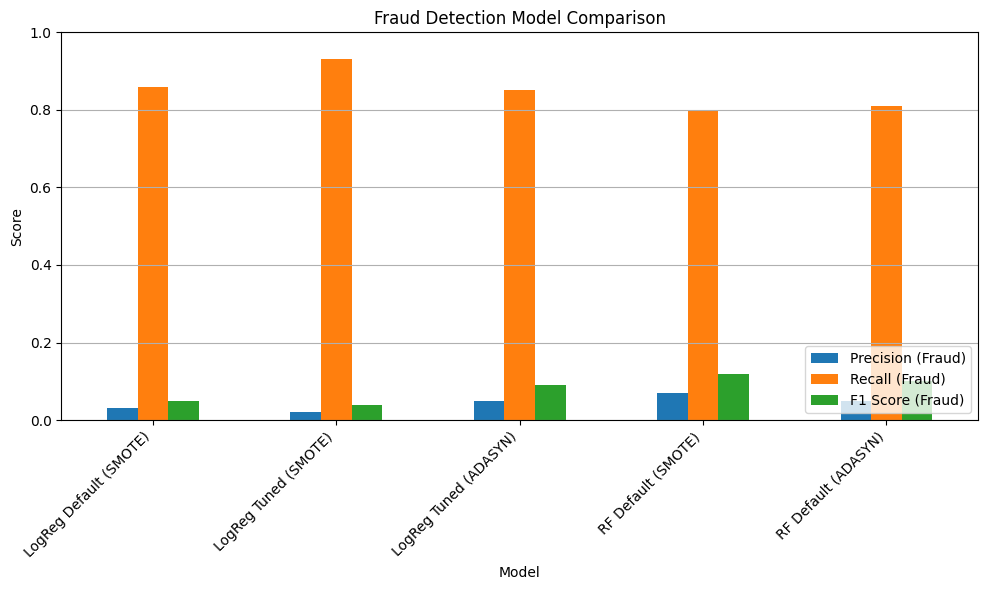

In [84]:
import matplotlib.pyplot as plt
import pandas as pd

# Simulasi hasil model untuk presentasi (kamu bisa update dengan nilai akurat)
comparison_data = {
    'Model': [
        'LogReg Default (SMOTE)', 'LogReg Tuned (SMOTE)', 'LogReg Tuned (ADASYN)',
        'RF Default (SMOTE)', 'RF Default (ADASYN)'
    ],
    'Precision (Fraud)': [0.03, 0.02, 0.05, 0.07, 0.05],
    'Recall (Fraud)': [0.86, 0.93, 0.85, 0.80, 0.81],
    'F1 Score (Fraud)': [0.05, 0.04, 0.09, 0.12, 0.10],
    'Accuracy': [0.81, 0.76, 0.85, 0.93, 0.92]
}

df_comparison = pd.DataFrame(comparison_data)

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
df_comparison.plot(x='Model', y=['Precision (Fraud)', 'Recall (Fraud)', 'F1 Score (Fraud)'],
                   kind='bar', ax=ax)
plt.title('Fraud Detection Model Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.tight_layout()
plt.grid(True, axis='y')
plt.legend(loc='lower right')
plt.show()


# Features Importance


=== Feature Importances (XGBoost - Original Data) ===
                    Feature  Importance
6     risk_category_of_hour    0.464227
0                       amt    0.308347
18      category_fraud_rate    0.076769
12     is_night_transaction    0.029610
13  transaction_count_daily    0.021111
14        time_diff_minutes    0.019338
5                      hour    0.016368
9                       Age    0.010741
10           gender_encoded    0.010228
8         distance_category    0.009271
2                     month    0.008013
4               day_of_week    0.006315
1                  city_pop    0.005766
17           job_fraud_rate    0.005042
7                  distance    0.004109
3                       day    0.003879
15        is_high_frequency    0.000866
11           is_high_amount    0.000000
16                  log_amt    0.000000


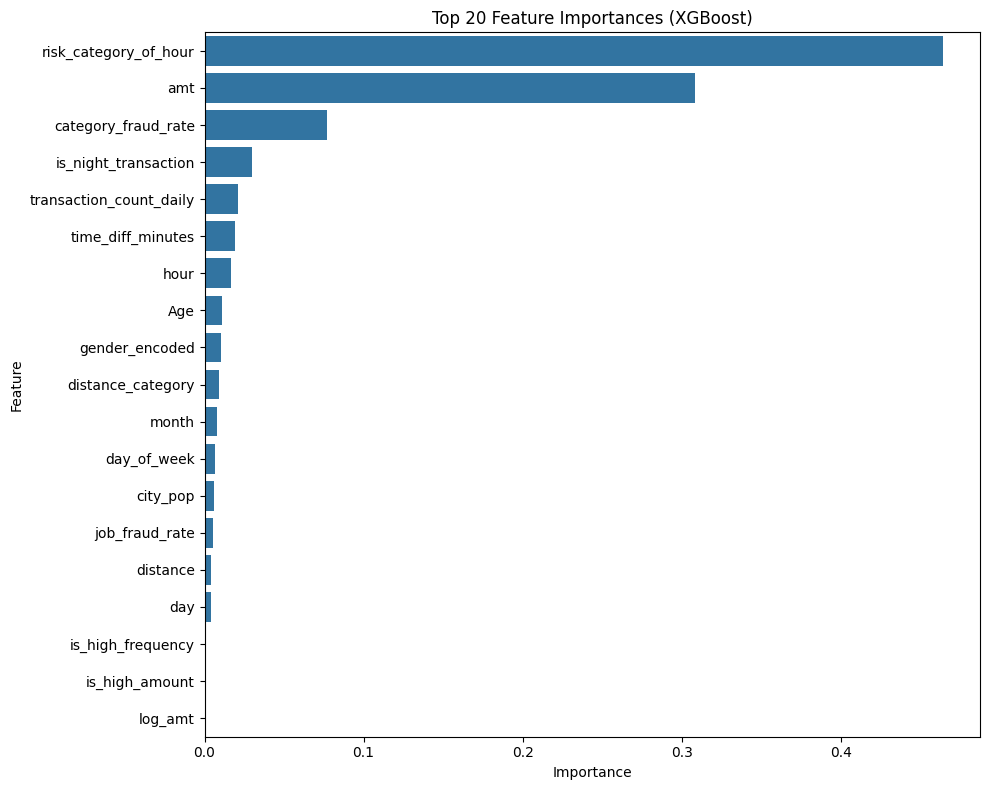

In [85]:
# prompt: buatkan feature importance pada model XGBoost

import pandas as pd
import matplotlib.pyplot as plt
# Features Importance
# Get feature importances from the trained XGBoost model
feature_importances = xgb_model.feature_importances_

# Get feature names from the training data
feature_names = x_train.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print("\n=== Feature Importances (XGBoost - Original Data) ===")
print(importance_df)

# Visualize feature importances (optional)
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(20)) # Display top 20 features
plt.title('Top 20 Feature Importances (XGBoost)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()